In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = 'https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/'

# 1 - ENCONTRAR PALAVRAS

In [33]:
df = pd.read_csv(path + 'Cleaned_cnn_comments.csv')

df.head()

,comment_text,likes,comment_time
0,"Just like US did not abandon Vietnam, Iraq, Af...",73,7200.0
1,Anybody else getting tired of these people spe...,193,7200.0
2,"""If two fish are fighting in a river an Englis...",45,7200.0
3,"""Not abandon"" is not equal to ""Defend/no fly-z...",7,7200.0
4,It's time we pray that our world leaders get a...,52,7200.0


In [35]:
def word_exist(x):
  for word in ['Biden','Trump','Ukraine','Russia','US']:
    if x.count(word) > 0:
      return word
  return None

df['word'] = df.comment_text.apply(lambda x: word_exist(x))

# df[ ~df['word'].isnull() ]

df.groupby('word').word.count().sort_values(ascending=False)

word
Trump      1162
Ukraine     881
Russia      575
US          418
Biden       289
Name: word, dtype: int64

### Tentativa ana

In [6]:
# seu código
df.comment_text.str.find('Biden').sum()

np.int64(-198)

In [7]:
df.comment_text.str.find('Trump').sum()

np.int64(46284)

In [8]:
df.comment_text.str.find('Ukraine').sum()


np.int64(33093)

In [9]:
df.comment_text.str.find('Biden').unique()

array([  -1,    0,   46,   55,   38,   76,   16,  590,    4,   62,   93,
         42,    7,   91,   10,   31,   39,   12,   26,   41,  147,   75,
         27,  268,   11,  118,   13,   86,   56,   66,   15,   29,   57,
         70,   48,  270,   45,   32,   17,  493,   49,   90,   14,   18,
         22,   34,  140,   33,  111,  100,   21,   40,   20,   19,   84,
         71,   35,   72,   50,   79,   28,  116,  868,   97,   25,  125,
          8,  666,   77,   36,   44,   81,   51,    6,   61,   37,   60,
         47,  179,   88,   82,   53,   74,  104,  574,  181,   99,  114,
        335,    3,  197,   24,  122,   67,   52,  107,   85,   59,   63,
        180,   87,  149,   64,   54,   80,    5,   65,  108,  128,   30,
        110,  124,  105, 1358,   78,    1])

In [19]:
for string in ['Biden','Trump','Ukraine','Russia','US']:
    print(f"                        {string}")
    print(df[ df.comment_text.str.contains(string,na=False) ].count())


                        Biden
comment_text    289
likes           289
comment_time    289
word            289
dtype: int64
                        Trump
comment_text    1224
likes           1224
comment_time    1224
word            1224
dtype: int64
                        Ukraine
comment_text    892
likes           892
comment_time    892
word            892
dtype: int64
                        Russia
comment_text    855
likes           855
comment_time    855
word            855
dtype: int64
                        US
comment_text    542
likes           542
comment_time    542
word            542
dtype: int64


In [14]:
print(df[ df.comment_text.str.contains(string,na=False) ])


                                            comment_text likes  comment_time  \
0      Just like US did not abandon Vietnam, Iraq, Af...    73        7200.0   
7      Nance says the US won't abandon Taiwan, as she...    19        7200.0   
8                     Also US : "We Selling Weapon soon"    23        7200.0   
13     Let's congratulate the US on serving the polic...     1        7200.0   
14     the only reason US will not abandon Taiwan is ...     4        7200.0   
...                                                  ...   ...           ...   
17661  It is understandable why zombie movies are mad...     3         720.0   
17682  ....and just like last time Serbia is now draw...     1         720.0   
17717           RUSSIA 🇷🇺️  \r\nUkraine loses  zellensky     1         720.0   
17725  Go Russia go! Take your country back protect y...     5         720.0   
17788  They have loads of money for Ukraine but not f...     7         720.0   

          word  
0           US  
7    

# 2 - transformando em numero

In [36]:
def change_stringK2value(s):

  if s.find('K') > 0:
    s = s.replace('K','')
    value = float(s) * 1000
  else:
    value = float(s)

  return value

df['likes_numeric'] = df.likes.apply(lambda s: change_stringK2value(s))

df.groupby('word').likes_numeric.sum().sort_values(ascending=False)


word
Trump      46559.0
Ukraine    17627.0
Russia     13408.0
US         10080.0
Biden       2583.0
Name: likes_numeric, dtype: float64

## tentativa ana

In [23]:

df["likesNumerico"] = df.likes.apply(lambda x: x.replace("K","000"))
df
df["likesNumerico2"] = df.likesNumerico.astype(float)

In [24]:
df.likes = df.likes.str.replace('K', '').astype(float) * 1000

In [26]:
df

,comment_text,likes,comment_time,likesNumerico,likesNumerico2
0,"Just like US did not abandon Vietnam, Iraq, Af...",73000.0,7200.0,73,73.0
1,Anybody else getting tired of these people spe...,193000.0,7200.0,193,193.0
2,"""If two fish are fighting in a river an Englis...",45000.0,7200.0,45,45.0
3,"""Not abandon"" is not equal to ""Defend/no fly-z...",7000.0,7200.0,7,7.0
4,It's time we pray that our world leaders get a...,52000.0,7200.0,52,52.0
...,...,...,...,...,...
17805,Крагунана бракта дриктоскт кубланкт гизания гр...,1000.0,720.0,1,1.0
17806,Yaaaa now they get too spend more of our tax d...,1000.0,720.0,1,1.0
17807,Каркустка страктакта барзактория бакраска буст...,1000.0,720.0,1,1.0
17808,BRING BACK TRUMP2024,2000.0,720.0,2,2.0


In [27]:
df.likesNumerico.astype(float).dtype

dtype('float64')

In [28]:
df.dtypes


comment_text       object
likes             float64
comment_time      float64
likesNumerico      object
likesNumerico2    float64
dtype: object

In [30]:
df[ df.comment_text.str.contains('US ',na=False) ]["likesNumerico2"].sum()

np.float64(5293.8)

In [31]:
df[ df.comment_text.str.contains('US ',na=False) ]["likesNumerico"].sum()

'731923142112014811223611411311713228115161685002138158022344235741324241321113821611512346411244810484131102619211.700015711211679214121711111.100084141330111148133123521111122341217211111404167161221132311112152941524447105254101381381271334243115234441468153331614074191921101111114113112721624021111129811582311112802406755611153442511111510112434117713720671111111111112111111117'

# 3

In [38]:
df = pd.read_csv(path + 'AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0
1,25235,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,162,2019-06-28,1.46,2,137
2,76761,Eveland the Place to Stay & Enjoy a 5-⭐️ 2bdrm,118971,Evelyn,Brooklyn,South Slope,40.66552,-73.99019,Entire home/apt,169,2,398,2019-06-28,3.97,3,182
3,135465,Garden apartment close to Manhattan,663879,Christopher,Brooklyn,Fort Greene,40.68626,-73.97598,Entire home/apt,170,3,86,2019-06-20,0.91,2,286
4,169002,Modern Space in Charming Pre-war,805344,Alec,Manhattan,Harlem,40.82411,-73.94934,Private room,65,2,41,2019-06-16,0.43,2,59


In [39]:
df.groupby(['host_name','host_id']).id.count().sort_values(ascending=False).head()

host_name     host_id  
Sonder (NYC)  219517861    7
Kara          30283594     4
Stanley       120762452    4
Hiroki        19303369     4
Chayla        69545883     2
Name: id, dtype: int64

In [42]:
display(df.groupby(['host_name']).id.count().sort_values(ascending=False).head()) # cuidado nomes =s e ids diferentes


df[ df.host_name == 'Mark' ][['host_name','host_id']]

host_name
Sonder (NYC)    7
Mark            7
David           6
Andrew          6
Michael         5
Name: id, dtype: int64

,host_name,host_id
305,Mark,92322271
396,Mark,14140453
415,Mark,145011016
576,Mark,124743046
614,Mark,215229943
696,Mark,109448921
735,Mark,52577963


## 3-a
Considere o preço médio dos imóveis. Existe diferença do preço médio dos imóveis dos anunciantes com mais de um imóvel e dos anunciantes com um único imóvel na plataforma?

In [43]:
df_count = df.groupby('host_id')[['id']].count()
df_count = df_count[ df_count.id > 1 ]

print( f'Preço médio para anunciantes com mais de um imóvel: {df[ df.host_id.isin( df_count.index ) ].price.mean():.2f}')
print( f'Preço médio para anunciantes com um único imóvel: {df[ ~df.host_id.isin( df_count.index ) ].price.mean():.2f}')
print( f'Diferença de preços: {df[ df.host_id.isin( df_count.index ) ].price.mean() - df[ ~df.host_id.isin( df_count.index ) ].price.mean():.2f}')

Preço médio para anunciantes com mais de um imóvel: 218.16
Preço médio para anunciantes com um único imóvel: 150.35
Diferença de preços: 67.81


In [44]:
df[ df.neighbourhood_group == 'Manhattan' ].groupby('neighbourhood').price.mean().sort_values(ascending=False).head(3)
# **Qual a vizinhança (`neighbourhood_group`) de Manhattan com a maior média de preços de aluguel, e qual é esse valor?**

neighbourhood
West Village         440.529412
Flatiron District    375.000000
Midtown              346.033333
Name: price, dtype: float64

## Q24.  Manhattan $\times$ Brooklyn

**Qual o percentual de imóveis de Manhattan e do Brooklyn com preços estatisticamente discrepantes (*outliers*) com relação ao preço geral (toda a base) dos imóveis?**

<br>

Nota:
1. Lembrando, *outliers* são dados fora do intervalo

$$[Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]$$

> onde $IQR$ é a distância interquartil.

In [45]:
q1, q3 = df.price.quantile([0.25,0.75])
iqr = q3 - q1

perc_Manhattan = df[ (df.neighbourhood_group == 'Manhattan') & (df.price >= q3 + 1.5 * iqr) ].id.count() / len(df[ (df.neighbourhood_group == 'Manhattan') ])
perc_Brooklyn  = df[ (df.neighbourhood_group == 'Brooklyn') & (df.price >= q3 + 1.5 * iqr) ].id.count() / len(df[ (df.neighbourhood_group == 'Brooklyn') ])

print( f'Percentuais de outliers de preços, Manhattan: {perc_Manhattan:.3f} e Brooklyn: {perc_Brooklyn:.3f}')


Percentuais de outliers de preços, Manhattan: 0.101 e Brooklyn: 0.039


In [46]:
df_mean_std = df.groupby('neighbourhood_group').price.agg(['mean','std'])
df_mean_std['std > mean'] = df_mean_std['std'] > df_mean_std['mean']
df_mean_std

,mean,std,std > mean
neighbourhood_group,,,
Bronx,71.500000,32.246583,False
Brooklyn,128.087879,135.909080,True
Manhattan,196.157609,234.131794,True
Queens,92.227848,72.164511,False
Staten Island,89.428571,40.236207,False


### Q26. Reviews $\times$ Preços, influenciam de que forma?

**Considere os imóveis com as 100 maiores quantidades de "revisões" (`number_of_reviews`) e os imóveis com as 100 menores quantidades de "revisões".  Existe diferença do preço médio dos imóveis entre esses dois grupos? Qual é essa diferença?**

<br>

Dica:
1. Atenção: Os imóveis com as 100 maiores (menores) quantidades de reviews não pode ser obtida direta e somente com `nlargest(100)` (`nsmallest(100)`) (por que???). Mesmo assim esses comandos podem ser úteis aqui.

> $[1, 2, 3, 3, 3, 4, 5, 6]$, por exemplo tem `nsmallest(3)` = $[1, 2, 3]$, mas $[1, 2, 3, 3, 3]$ ocorrências com os 3 menores valores!



In [47]:
more_reviews = df.nlargest(100,'number_of_reviews').number_of_reviews.min()
less_reviews = df.nsmallest(100,'number_of_reviews').number_of_reviews.max()

mean_more_reviews = df[ (df.number_of_reviews >= more_reviews) ].price.mean()
mean_less_reviews = df[ (df.number_of_reviews <= less_reviews) ].price.mean()

print( f'Preço médio de imóveis com mais reviews: {mean_more_reviews:.2f}')
print( f'Preço médio de imóveis com menos reviews: {mean_less_reviews:.2f}')
print( f'Diferença de preços: {mean_more_reviews - mean_less_reviews:.2f}')


Preço médio de imóveis com mais reviews: 124.62
Preço médio de imóveis com menos reviews: 188.89
Diferença de preços: -64.27


# 4

In [48]:
df = pd.read_csv(path + 'gapminder_co2_emissions_tonnes_per_person.csv')
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,NaN,1.610,1.590
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400,3.28,3.270,3.430,3.48,3.680,3.800,3.640,3.560,3.690
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,NaN,1.28,1.640,1.220,1.180,1.140,1.120


In [49]:
display(df['1800'].isnull().sum())
df[ ~df['1800'].isnull() ]

np.int64(187)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
30,Canada,0.00733,0.00716,0.00698,0.00681,0.00665,0.00649,0.00633,0.00618,0.00603,...,16.10,16.30,16.40,16.30,16.40,16.20,16.00,15.50,15.60,15.30
64,Germany,0.04420,0.02930,0.02980,0.02830,0.05250,0.05340,0.04730,0.13300,0.04380,...,9.76,10.30,10.00,10.10,10.30,9.74,9.74,9.76,9.66,9.14
137,Poland,0.04520,0.04890,0.04940,0.05020,0.04950,0.06130,0.05540,0.03990,0.05260,...,8.23,8.71,8.70,8.52,8.43,8.11,8.22,8.51,8.88,9.07
182,United Kingdom,2.48000,2.46000,2.45000,2.72000,2.70000,2.78000,2.90000,2.87000,2.84000,...,7.87,8.07,7.34,7.56,7.36,6.71,6.42,6.04,5.81,5.65
183,United States,0.04220,0.04380,0.04650,0.04680,0.05160,0.05170,0.04970,0.05520,0.05630,...,17.90,18.50,17.90,17.10,17.50,17.50,16.90,16.40,16.20,16.60


In [50]:
print( f"Total de emissões reportadas em 1800: {df[ ~df['1800'].isnull() ]['1800'].sum():.3f}")

Total de emissões reportadas em 1800: 2.619


## Q32. Emissões nos últimos 10 anos || prrenchimento de valores ausentes

Preencha esses valores ausentes para os últimos 10 anos com o valor do ano anterior. Crie então uma coluna `mean10years` com os valores médios de emissões dos últimos 10 anos de cada país. Em seguida responda:

**Qual o percentual de países geraram mais emissões no ano de 2018 que a média de seus últimos 10 anos? (o ano de 2018 incluído)**

<br>

Dicas:
1. Para preencher os valores você pode querer empregar `fillna()`. Verifique as opções do comando.

In [57]:
df.iloc[:,-10::].fillna(method='ffill',axis=1).head()
# todas as linhas , inicio,pulo, fim

/tmp/ipykernel_329932/1246975078.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:,-10::].fillna(method='ffill',axis=1).head()


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.600,1.610,1.590
2,3.400,3.28,3.270,3.430,3.48,3.680,3.800,3.640,3.560,3.690
3,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,1.230,1.24,1.250,1.250,1.28,1.640,1.220,1.180,1.140,1.120


In [58]:
df['mean10years'] = df.iloc[:,-10::].fillna(method='ffill',axis=1).mean(axis=1)

print( f"Percentual de países geraram mais emissões no ano de 2018 que a média de seus últimos 10 anos: {len( df[ df['2018'] > df['mean10years'] ] ) / len(df) :.3f}")


Percentual de países geraram mais emissões no ano de 2018 que a média de seus últimos 10 anos: 0.594


/tmp/ipykernel_329932/1124021666.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['mean10years'] = df.iloc[:,-10::].fillna(method='ffill',axis=1).mean(axis=1)


In [51]:
df.iloc[:,-10::]

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.238,0.290,0.406,0.345,0.280,0.253,0.262,0.245,0.247,0.254
1,1.470,1.560,1.790,1.690,1.690,1.900,1.600,NaN,1.610,1.590
2,3.400,3.280,3.270,3.430,3.480,3.680,3.800,3.640,3.560,3.690
3,6.120,6.120,5.870,5.920,5.900,5.830,5.970,6.070,6.270,6.120
4,1.230,1.240,1.250,NaN,1.280,1.640,1.220,1.180,1.140,1.120
...,...,...,...,...,...,...,...,...,...,...
187,6.430,6.670,5.900,6.510,6.140,6.130,5.690,5.470,5.230,4.810
188,1.410,1.550,1.630,1.510,1.550,1.750,1.950,1.960,1.950,2.160
189,1.080,1.000,0.849,0.747,0.994,0.937,0.480,0.377,0.363,0.356
190,0.182,0.189,0.199,0.241,0.252,0.277,0.271,0.296,0.304,0.302


In [55]:
df.isnull().iloc[:,-10::]

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
187,False,False,False,False,False,False,False,False,False,False
188,False,False,False,False,False,False,False,False,False,False
189,False,False,False,False,False,False,False,False,False,False
190,False,False,False,False,False,False,False,False,False,False


In [54]:
df[df.isnull()].iloc[:,-10::]

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.iloc[:,-10::].fillna(method='ffill',axis=1).head()

## Posição no sortvalues

In [59]:
china_rank = df[['country','mean10years']].sort_values('mean10years',ascending=False)['country'].to_list().index('China') + 1

print( f"Posição da China no ranking dos maiores emissores em média nos últimos 10 anos: {china_rank :d}")

Posição da China no ranking dos maiores emissores em média nos últimos 10 anos: 42


In [61]:
df[['country','mean10years']].sort_values('mean10years',ascending=False)[['country','mean10years']]

,country,mean10years
139,Qatar,39.87000
174,Trinidad and Tobago,33.51000
89,Kuwait,26.52000
12,Bahrain,22.82000
181,United Arab Emirates,21.47000
...,...,...
33,Chad,0.07145
32,Central African Republic,0.06373
154,Somalia,0.04789
27,Burundi,0.04049


In [65]:
df[['country','mean10years']].sort_values('mean10years',ascending=False)[['country','mean10years']].head(42).reset_index()

,index,country,mean10years
0,139,Qatar,39.870
1,174,Trinidad and Tobago,33.510
2,89,Kuwait,26.520
3,12,Bahrain,22.820
4,181,United Arab Emirates,21.470
5,24,Brunei,20.100
6,145,Saudi Arabia,18.740
7,99,Luxembourg,18.590
8,8,Australia,17.450
9,183,United States,17.250


In [66]:
df[['country','mean10years']].sort_values('mean10years',ascending=False)['country'].to_list()

['Qatar',
 'Trinidad and Tobago',
 'Kuwait',
 'Bahrain',
 'United Arab Emirates',
 'Brunei',
 'Saudi Arabia',
 'Luxembourg',
 'Australia',
 'United States',
 'Canada',
 'Oman',
 'Kazakhstan',
 'Estonia',
 'Palau',
 'Turkmenistan',
 'South Korea',
 'Russia',
 'Iceland',
 'Czech Republic',
 'Netherlands',
 'Germany',
 'Japan',
 'Finland',
 'Singapore',
 'Belgium',
 'Mongolia',
 'Norway',
 'South Africa',
 'Poland',
 'Israel',
 'Libya',
 'Ireland',
 'Iran',
 'Austria',
 'Greece',
 'New Zealand',
 'Malaysia',
 'Slovenia',
 'Denmark',
 'United Kingdom',
 'China',
 'Belarus',
 'Slovak Republic',
 'Cyprus',
 'Bulgaria',
 'Equatorial Guinea',
 'Italy',
 'Bosnia and Herzegovina',
 'Andorra',
 'Venezuela',
 'Ukraine',
 'Antigua and Barbuda',
 'Spain',
 'France',
 'Bahamas',
 'Seychelles',
 'Malta',
 'Switzerland',
 'Serbia',
 'Portugal',
 'Hungary',
 'Barbados',
 'Turkey',
 'Sweden',
 'Liechtenstein',
 'Iraq',
 'St. Kitts and Nevis',
 'Argentina',
 'Croatia',
 'Lithuania',
 'Chile',
 'Nauru',
 '

ou

In [67]:
china_rank = len( df[ df['mean10years'] > df[ df.country ==  'China' ]['mean10years'].values[0] ] ) + 1

print( f"Posição da China no ranking dos maiores emissores em média nos últimos 10 anos: {china_rank :d}")

Posição da China no ranking dos maiores emissores em média nos últimos 10 anos: 42


In [68]:
df[ df.country ==  'China' ]['mean10years']

35    6.755
Name: mean10years, dtype: float64

In [70]:
df[ df.country ==  'China' ]['mean10years'].values[0]

np.float64(6.755)

## cumsum() -- faz a somatoria acumulada dos dados

In [72]:
df_2018 = df[['country','2018']].sort_values('2018',ascending=False)
df_2018['cumsum'] = df_2018['2018'].cumsum()
df_2018['cumpercent'] = df_2018['cumsum'] / df_2018['cumsum'].max()

perc_countries80co2 = len( df_2018[ df_2018['cumpercent'] <= 0.8 ] ) / len(df)

print( f"Percentual de países responsáveis por 80% das emissões em 2018: {perc_countries80co2 :.3f}")


Percentual de países responsáveis por 80% das emissões em 2018: 0.370


In [73]:
df_2018

,country,2018,cumsum,cumpercent
139,Qatar,38.0000,38.0000,0.044425
174,Trinidad and Tobago,31.3000,69.3000,0.081018
89,Kuwait,23.7000,93.0000,0.108725
181,United Arab Emirates,21.4000,114.4000,0.133744
12,Bahrain,19.8000,134.2000,0.156892
...,...,...,...,...
33,Chad,0.0656,855.1851,0.999786
32,Central African Republic,0.0651,855.2502,0.999863
27,Burundi,0.0467,855.2969,0.999917
154,Somalia,0.0466,855.3435,0.999972


## Q35. Emissões na China

**Qual o percentual de crescimento (ou descréscimo) das emissões médias da China entre as décadas de 1960 e última década na base?**

<br>

Dicas:
1. Você pode querer empregar a função `decade()` (construída em sala) para criar uma coluna de décadas e os valores médios de emissões para cada década.

In [74]:
def decade(year):
 return (year // 10) * 10

df = pd.read_csv(path + 'gapminder_co2_emissions_tonnes_per_person.csv') # ou exclua a coluna mean10years adicionada antes

china = df[ df.country == 'China' ].melt('country')
china = china.dropna()
china.variable = china.variable.astype('int')

china['decade'] = china.variable.apply(decade)

china.head()

,country,variable,value,decade
99,China,1899,0.00024,1890
102,China,1902,0.00023,1900
103,China,1903,0.00481,1900
104,China,1904,0.00509,1900
105,China,1905,0.00557,1900


In [75]:
china.groupby('decade').value.mean().head()

decade
1890    0.000240
1900    0.025087
1910    0.040590
1920    0.064800
1930    0.101580
Name: value, dtype: float64

In [76]:
df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.290,0.406,0.345,0.280,0.253,0.262,0.245,0.247,0.254
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.560,1.790,1.690,1.690,1.900,1.600,NaN,1.610,1.590
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400,3.280,3.270,3.430,3.480,3.680,3.800,3.640,3.560,3.690
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.120,5.870,5.920,5.900,5.830,5.970,6.070,6.270,6.120
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.240,1.250,NaN,1.280,1.640,1.220,1.180,1.140,1.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.430,6.670,5.900,6.510,6.140,6.130,5.690,5.470,5.230,4.810
188,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.410,1.550,1.630,1.510,1.550,1.750,1.950,1.960,1.950,2.160
189,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.080,1.000,0.849,0.747,0.994,0.937,0.480,0.377,0.363,0.356
190,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.182,0.189,0.199,0.241,0.252,0.277,0.271,0.296,0.304,0.302


## Contar valores nulos
Q36. Países em atraso no controle de emissões

**Que país passou a reportar mais tardiamente os dados sobre emissões? Informe o ano em que esse país passou a reportar suas emissões.**

In [85]:
df.melt(id_vars='country').dropna().groupby(['country']).variable.min().sort_values(ascending=False)

country
Timor-Leste              2002
Palau                    1992
Micronesia, Fed. Sts.    1992
Marshall Islands         1992
Namibia                  1991
                         ... 
Canada                   1800
Poland                   1800
United States            1800
United Kingdom           1800
Germany                  1800
Name: variable, Length: 192, dtype: object

In [82]:
df.melt(id_vars='country').dropna().groupby(['country']).variable.min().max()

'2002'

In [83]:
d2 = pd.DataFrame( df.melt(id_vars='country').dropna().groupby(['country']).variable.min() )
d2.variable = d2.variable.astype('int')
d2.nlargest(1,'variable')

,variable
country,
Timor-Leste,2002


In [77]:
df.melt(id_vars='country')

,country,variable,value
0,Afghanistan,1800,NaN
1,Albania,1800,NaN
2,Algeria,1800,NaN
3,Andorra,1800,NaN
4,Angola,1800,NaN
...,...,...,...
42043,Venezuela,2018,4.810
42044,Vietnam,2018,2.160
42045,Yemen,2018,0.356
42046,Zambia,2018,0.302


In [78]:
df.melt(id_vars='country').dropna()

,country,variable,value
30,Canada,1800,0.00733
64,Germany,1800,0.04420
137,Poland,1800,0.04520
182,United Kingdom,1800,2.48000
183,United States,1800,0.04220
...,...,...,...
42043,Venezuela,2018,4.81000
42044,Vietnam,2018,2.16000
42045,Yemen,2018,0.35600
42046,Zambia,2018,0.30200


In [79]:
df.melt(id_vars='country').dropna().groupby(['country']).variable.min()

country
Afghanistan    1949
Albania        1933
Algeria        1900
Andorra        1990
Angola         1950
               ... 
Venezuela      1904
Vietnam        1892
Yemen          1950
Zambia         1959
Zimbabwe       1903
Name: variable, Length: 192, dtype: object

# 5 - dropar tabelas

In [87]:
wid = pd.read_csv(path + 'WID_Data_13092021-135730.csv')
wid.head()

,country,ind_description,ind_code,year,value
0,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2000,16488.0559
1,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2001,16323.1697
2,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2002,16416.2538
3,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2003,16204.9913
4,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2004,16740.7222


In [88]:
wid.ind_code.unique()

array(['pall', 'p90p100'], dtype=object)

* **`pall`** = corresponde ao PIB em USD  
* **`p90p100`** = corresponde ao percentual do PIB que se concentra em 90% da população mais pobre (por exemplo, se a distribuição fosse perfeitamente igualitária 90% da população corresponderia a 90% do PIB, e um percentual maior significa uma melhor distribuição de renda)  

In [89]:
wid.drop(columns='ind_description',inplace=True) # somente para deixar mais limpo, esse atributo não será necessário


In [90]:

display( wid[ (wid.ind_code == 'p90p100') & (wid.year == wid.year.min()) ] )
display( wid[ (wid.ind_code == 'p90p100') & (wid.year == wid.year.max()) ] )

,country,ind_code,year,value
20,Brazil,p90p100,2000,0.5654


,country,ind_code,year,value
39,Brazil,p90p100,2019,0.5856


## Q42. Qual a concentração média do PIB nas classes mais pobres no período?

**Qual o valor médio do PIB atribuído a 90% da população mais pobre considerados todos os anos da base?**

<br>

Dica:
1. Entenda que o valor do PIB atribuído a 90% da população mais pobre é um percentual que é fornecido na base para cada ano.
2. `groupby()` pode ser um comando útil aqui, mas não é obrigatório.

In [91]:
wid_reshape = wid.groupby(['year','ind_code'])['value'].mean().unstack() # mean(), max(), min()... todos retornam o mesmo valor já que os valores são únicos
wid_reshape.head()

ind_code,p90p100,pall
year,,
2000,0.5654,16488.0559
2001,0.5654,16323.1697
2002,0.5425,16416.2538
2003,0.5680,16204.9913
2004,0.5642,16740.7222


In [98]:
wid_reshape['p90p100_all'] = wid_reshape['p90p100'] * wid_reshape['pall']
wid_reshape.head()

ind_code,p90p100,pall,p90p100_all
year,,,
2000,0.5654,16488.0559,9322.346806
2001,0.5654,16323.1697,9229.120148
2002,0.5425,16416.2538,8905.817686
2003,0.5680,16204.9913,9204.435058
2004,0.5642,16740.7222,9445.115465


In [99]:
wid_reshape

ind_code,p90p100,pall,p90p100_all
year,,,
2000,0.5654,16488.0559,9322.346806
2001,0.5654,16323.1697,9229.120148
2002,0.5425,16416.2538,8905.817686
2003,0.5680,16204.9913,9204.435058
2004,0.5642,16740.7222,9445.115465
2005,0.5637,16895.3652,9523.917363
2006,0.5676,17186.5514,9755.086575
2007,0.5326,17859.2235,9511.822436
2008,0.5819,18405.1977,10709.984542


In [100]:
print( f"Valor médio do PIB no período atribuído a 90% dos mais pobres: {wid_reshape['p90p100_all'].mean() :.3f}")

Valor médio do PIB no período atribuído a 90% dos mais pobres: 10307.244


# **Case 6**: World Inequality $\times$ Gapminder

Neste case analise as relações entre emissões de CO2, escolaridade e nível de concentração de renda no Brasil a partir das 3 bases abaixo.


In [101]:
school = pd.read_csv(path + 'gapminder_school_men_15_to_24_years.csv')
school_BR = school[ school.country == 'Brazil']
school_BR.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
23,Brazil,3.4,3.47,3.55,3.64,3.72,3.8,3.89,3.97,4.06,...,7.04,7.17,7.29,7.42,7.55,7.68,7.81,7.94,8.08,8.21


In [102]:
co2 = pd.read_csv(path + 'gapminder_co2_emissions_tonnes_per_person.csv')
co2_BR = co2[ co2.country == 'Brazil']
co2_BR.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
23,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.86,2.1,2.18,2.31,2.46,2.59,2.42,2.2,2.23,2.18


In [103]:
wid = pd.read_csv(path + 'WID_Data_13092021-135730.csv')
wid.head()

,country,ind_description,ind_code,year,value
0,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2000,16488.0559
1,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2001,16323.1697
2,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2002,16416.2538
3,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2003,16204.9913
4,Brazil,agdpro_pall_992_i_BR\nGross domestic product\n...,pall,2004,16740.7222


In [104]:
school_BR_melt = school_BR.melt('country')
school_BR_melt.columns = ['country','year','school_years']
school_BR_melt.head()

,country,year,school_years
0,Brazil,1970,3.40
1,Brazil,1971,3.47
2,Brazil,1972,3.55
3,Brazil,1973,3.64
4,Brazil,1974,3.72


In [105]:
co2_BR_melt = co2_BR.melt('country')
co2_BR_melt.columns = ['country','year','co2']
co2_BR_melt.head()

,country,year,co2
0,Brazil,1800,NaN
1,Brazil,1801,NaN
2,Brazil,1802,NaN
3,Brazil,1803,NaN
4,Brazil,1804,NaN


In [106]:
school_co2_BR = school_BR_melt.merge(co2_BR_melt)
school_co2_BR.head()

,country,year,school_years,co2
0,Brazil,1970,3.40,0.984
1,Brazil,1971,3.47,1.050
2,Brazil,1972,3.55,1.140
3,Brazil,1973,3.64,1.290
4,Brazil,1974,3.72,1.370


In [107]:
print(f'Número de linhas: {len(school_co2_BR):d}')
print(f'Soma das emissões: {school_co2_BR.co2.sum():.2f}')

Número de linhas: 46
Soma das emissões: 75.64


In [108]:
school_co2_BR[['school_years','co2']].corr()

,school_years,co2
school_years,1.000000,0.916627
co2,0.916627,1.000000


## Normalização de dados com apply

In [109]:
def normalize(column):
  return (column - column.mean()) / column.std()

school_co2_BR_std = school_co2_BR.copy()

school_co2_BR_std[['school_years','co2']] = school_co2_BR_std[['school_years','co2']].apply(normalize)
school_co2_BR_std.describe()

,school_years,co2
count,4.600000e+01,4.600000e+01
mean,1.448117e-17,-3.765104e-16
std,1.000000e+00,1.000000e+00
min,-1.520679e+00,-1.811541e+00
25%,-8.594850e-01,-6.636155e-01
50%,-8.028198e-02,-3.001744e-01
75%,8.117232e-01,5.364260e-01
max,1.818266e+00,2.593640e+00


In [110]:
school_co2_BR.year = school_co2_BR.year.astype('int64')

school_co2_p90p100_BR = school_co2_BR.merge(wid[ wid.ind_code == 'p90p100' ][['country','year','value']])
school_co2_p90p100_BR.rename(columns={'value':'p90p100'},inplace=True)
school_co2_p90p100_BR.head()

,country,year,school_years,co2,p90p100
0,Brazil,2000,6.32,1.86,0.5654
1,Brazil,2001,6.43,1.88,0.5654
2,Brazil,2002,6.55,1.83,0.5425
3,Brazil,2003,6.67,1.75,0.5680
4,Brazil,2004,6.79,1.81,0.5642


In [111]:
school_co2_p90p100_BR[['school_years','co2','p90p100']].corr()

,school_years,co2,p90p100
school_years,1.000000,0.876336,0.693950
co2,0.876336,1.000000,0.630229
p90p100,0.693950,0.630229,1.000000


In [112]:
school_co2_p90p100_BR[['school_years','co2','p90p100']].apply(normalize).corr()

,school_years,co2,p90p100
school_years,1.000000,0.876336,0.693950
co2,0.876336,1.000000,0.630229
p90p100,0.693950,0.630229,1.000000


# P2

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import IFrame

path = 'https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/'

# Q1 

In [118]:
df1 = pd.read_csv(path + 'temperature-anomaly.csv')
df1 = df1[df1.Entity == 'Global']
df1 = df1.iloc[:,2:4]
df1.columns = ['year','temperature']
df1.head()

,year,temperature
0,1850,-0.417711
1,1851,-0.233350
2,1852,-0.229399
3,1853,-0.270354
4,1854,-0.291521


In [119]:
df2 = pd.read_csv(path + 'co-emissions-per-capita.csv')
df2 = df2[ df2.Entity.isin(['Brazil','World','China','United States','Europe (excl. EU-28)']) ].reset_index(drop=True)
df2 = df2.iloc[:,[0,2,3]]
df2.columns = ['country', 'year','co2']
df2.head()

,country,year,co2
0,Brazil,1901,0.113905
1,Brazil,1902,0.132818
2,Brazil,1903,0.126605
3,Brazil,1904,0.133064
4,Brazil,1905,0.139196


### Grafico ANA

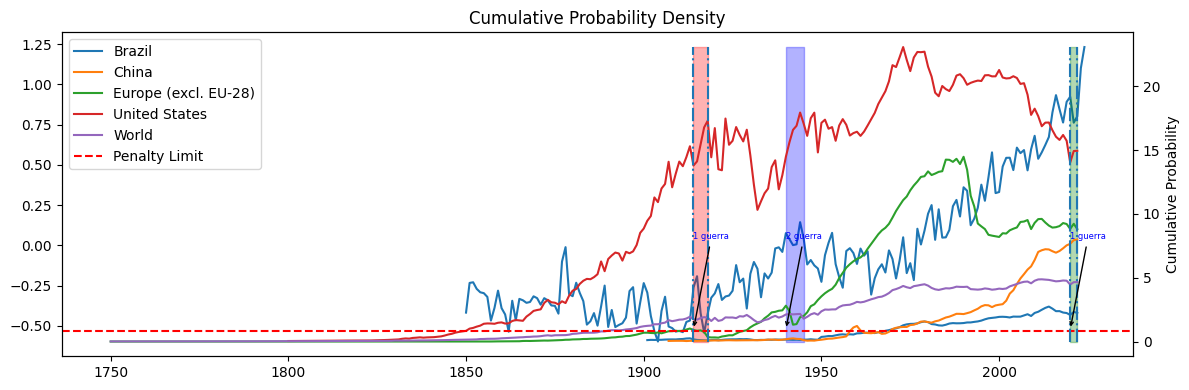

In [120]:

# Plotar a distribuição e a densidade de probabilidade acumulada
# plt.figure(figsize=(12, 4))
fig, ax1 = plt.subplots(figsize=(12, 4))
ax2 = ax1.twinx()
# Densidade de probabilidade acumulada
sns.lineplot(data = df2, x="year",y="co2", hue ="country", ax = ax2)
# df1
ax1.plot(df1.year,df1["temperature"], label= "Temperatura")

plt.axhline(y=0.8, color='red', linestyle='--', label='Penalty Limit')
plt.xlabel('arr_delay')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Probability Density')
plt.legend()

# # Preencher a faixa de valores penalizados
plt.fill_betweenx(np.linspace(df2['co2'].min(), df2['co2'].max(), 100),1914 , 1918, color='red', alpha=0.3)
plt.fill_betweenx(np.linspace(df2['co2'].min(), df2['co2'].max(), 100),1940 , 1945, color='b', alpha=0.3)
plt.fill_betweenx(np.linspace(df2['co2'].min(), df2['co2'].max(), 100),2020 , 2022, color='g', alpha=0.3)


plt.annotate('1 guerra',
             xy=(1914, 0.95),  # ponto do gráfico
             xytext=(1914, 8),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=6,
             color='b')
plt.annotate('2 guerra',
             xy=(1940, 0.95),  # ponto do gráfico
             xytext=(1940, 8),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=6,
             color='b')
plt.annotate('1 guerra',
             xy=(2020, 0.95),  # ponto do gráfico
             xytext=(2020, 8),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=6,
             color='b')

plt.vlines(1914,df2['co2'].min(), df2['co2'].max(),linestyle='-.' )
plt.vlines(1918,df2['co2'].min(), df2['co2'].max(),linestyle='-.')
plt.vlines(2020,df2['co2'].min(), df2['co2'].max(),linestyle='-.')
plt.vlines(2022,df2['co2'].min(), df2['co2'].max(),linestyle='-.')

plt.tight_layout()
plt.show()


### Joao

In [122]:
df_merged = pd.merge(df1,df2,on='year')
df_merged.head()

,year,temperature,country,co2
0,1850,-0.417711,Europe (excl. EU-28),0.003447
1,1850,-0.417711,United States,0.838701
2,1850,-0.417711,World,0.153855
3,1851,-0.233350,Europe (excl. EU-28),0.002184
4,1851,-0.233350,United States,1.013303


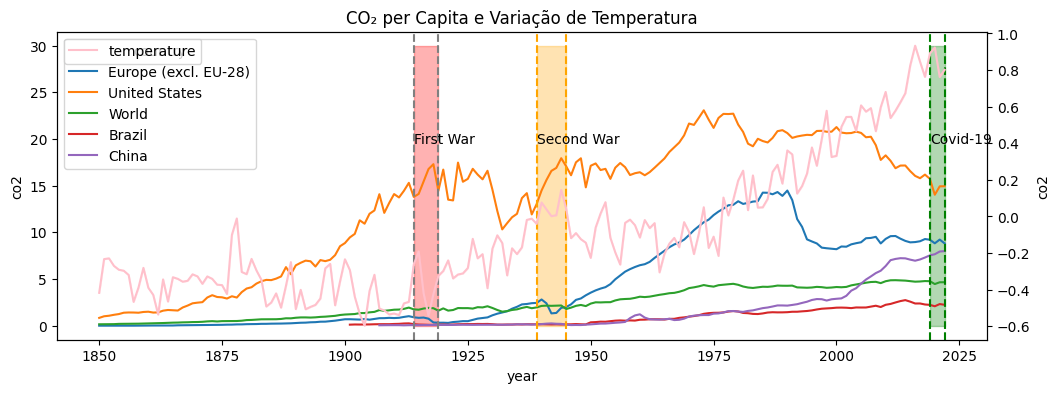

In [123]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=df_merged, x='year', y='co2', hue='country', palette='tab10',ax=ax)

ax.axvline(x=1914, color='gray', linestyle='--')
ax.axvline(x=1919, color='gray', linestyle='--')
ax.axvline(x=1939, color='orange', linestyle='--')
ax.axvline(x=1945, color='orange', linestyle='--')
ax.axvline(x=2019, color='green', linestyle='--')
ax.axvline(x=2022, color='green', linestyle='--')

ax.text(1914, 20, 'First War', verticalalignment='center')
ax.text(1939, 20, 'Second War', verticalalignment='center')
ax.text(2019, 20, 'Covid-19', verticalalignment='center')


ax.fill_betweenx([0, 30], 1914, 1919, color='red', alpha=0.3)
ax.fill_betweenx([0, 30], 1939, 1945, color='orange', alpha=0.3)
ax.fill_betweenx([0, 30], 2019, 2022, color='green', alpha=0.3)


ax2 = ax.twinx()
sns.lineplot(data=df_merged, x='year', y='temperature',color='pink',label='temperature', ax=ax2)
ax2.set_ylabel('temperature')
ax2.legend(['temperature'],)


plt.title('CO₂ per Capita e Variação de Temperatura')
plt.xlabel('year')
plt.ylabel('co2')


plt.show()

# 2 - correlação

## Joao

In [126]:
df_merged = df_merged[df_merged.year >= 1990]
display(df_merged.head())
df_merged.year.unique()

,year,temperature,country,co2
592,1990,0.360582,Brazil,1.450887
593,1990,0.360582,China,2.153806
594,1990,0.360582,Europe (excl. EU-28),14.481453
595,1990,0.360582,United States,20.642052
596,1990,0.360582,World,4.279900


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [125]:
df_merged.groupby('country').co2.corr(df_merged.temperature).sort_values(ascending=False)

country
China                   0.855632
Brazil                  0.760247
World                   0.724366
Europe (excl. EU-28)   -0.334652
United States          -0.817199
Name: co2, dtype: float64

In [132]:
# conferindo
df_merged.groupby('country').co2.corr(df_merged.co2).sort_values(ascending=False)

country
Brazil                  1.0
China                   1.0
Europe (excl. EU-28)    1.0
United States           1.0
World                   1.0
Name: co2, dtype: float64

## Ana

In [127]:
df_1990 = df2[df2.year >= 1990]
df_1990.head()

,country,year,co2
89,Brazil,1990,1.450887
90,Brazil,1991,1.496018
91,Brazil,1992,1.498395
92,Brazil,1993,1.541938
93,Brazil,1994,1.577843


In [128]:
df_1990.select_dtypes(include='number').corr(method='pearson')

,year,co2
year,1.00000,0.00182
co2,0.00182,1.00000


In [129]:
# df_corr = pd.DataFrame()

# for method in ['pearson', 'spearman', 'kendall']:
#     df_corr[method] = penguins.select_dtypes(include='number').corr(method=method)['bill_length_mm']

# df_corr = df_corr[df_corr.index != 'SalePrice'].sort_values(by='pearson',ascending=False)
# df_corr

In [131]:
df_merged.groupby('country').co2.corr(df_merged.co2).sort_values(ascending=False)

country
Brazil                  1.0
China                   1.0
Europe (excl. EU-28)    1.0
United States           1.0
World                   1.0
Name: co2, dtype: float64

# 3 - titanic

In [200]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## ANA


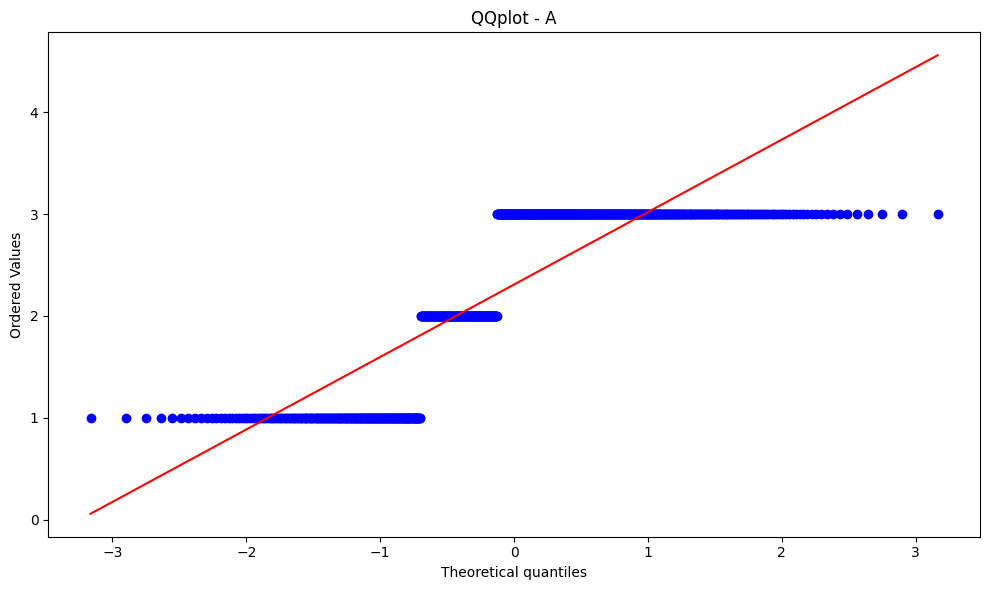

In [136]:
import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(df['pclass'], dist="norm", plot=plt)
plt.title("QQplot - A")
plt.tight_layout()
plt.show()

## Q2. Qual o resultado do teste de hipótese mais adequado para análise da influência da classe (pclass) de embarque do passageiro na sua sobrevivência?


Chi-Square Test é a melhor opção por se tratar de variáveis categóricas

<Axes: xlabel='pclass', ylabel='survived'>

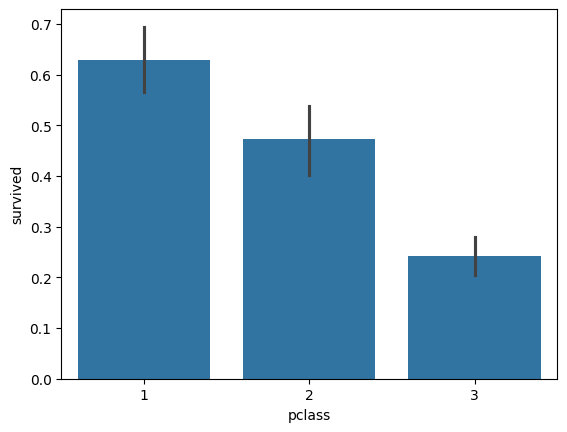

In [138]:
sns.barplot(x='pclass',y='survived',data=df)

In [139]:
contingency_table = pd.crosstab(df['pclass'], df['survived'])
contingency_table

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [140]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Tabela de Contingência:\n", contingency_table)
print("\nEstatística qui-quadrado:", chi2)
print("p-valor:", p)
print("Graus de liberdade:", dof)
print("Frequências esperadas:\n", expected)

Tabela de Contingência:
 survived    0    1
pclass            
1          80  136
2          97   87
3         372  119

Estatística qui-quadrado: 102.88898875696056
p-valor: 4.549251711298793e-23
Graus de liberdade: 2
Frequências esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


### CHAT

Para analisar a influência da classe de embarque (pclass) na sobrevivência (survived) dos passageiros do Titanic, um teste de hipótese adequado seria o Teste Qui-Quadrado de Independência. Esse teste verifica se existe uma associação significativa entre duas variáveis categóricas.

In [201]:
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Carregar o dataset Titanic
df = sns.load_dataset('titanic')

# Criar uma tabela de contingência
contingency_table = pd.crosstab(df['pclass'], df['survived'])

# Executar o teste Qui-Quadrado de Independência
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar os resultados
print(f"Estatística do Qui-Quadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Graus de Liberdade: {dof}")
print(f"Frequências Esperadas:\n{expected}")

Estatística do Qui-Quadrado: 102.88898875696056
p-valor: 4.549251711298793e-23
Graus de Liberdade: 2
Frequências Esperadas:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


Interpretação dos Resultados

Estatística do Qui-Quadrado: Valor calculado da estatística de teste.

p-valor: Probabilidade de observarmos os dados se a hipótese nula for verdadeira. Um p-valor pequeno (geralmente menor que 0.05) indica que rejeitamos a hipótese nula.

Graus de Liberdade (dof): Número de graus de liberdade do teste.

Frequências Esperadas: Frequências esperadas sob a hipótese nula de independência.


***CONCLUSÃO*** Com um p-valor muito pequeno (4.55e-23), rejeitamos a hipótese nula de que não há associação entre a classe de embarque e a sobrevivência. Portanto, concluímos que existe uma associação significativa entre a classe de embarque (pclass) e a sobrevivência (survived) dos passageiros do Titanic.

## Qual o teste de hipótese mais adequado para análise da influência da idade do passageiro na sua sobrevivência? Você pode assumir que a **idade tem distribuição normal**.

T Student pois estamos assumindo distribuição normal e não sao dados pareados.

In [141]:
from scipy.stats import ttest_ind

df_titanic = df.dropna(subset=['age'])

age_survived = df_titanic[df_titanic['survived'] == 1]['age']
age_not_survived = df_titanic[df_titanic['survived'] == 0]['age']

t_stat, p_value = ttest_ind(age_survived, age_not_survived)

print("Estatística t:", t_stat)
print("p-valor:", p_value)

Estatística t: -2.06668694625381
p-valor: 0.03912465401348249


In [142]:
if p_value < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")

Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(data=df, x=var, hue='quality', ax=ax, palette='viridis',alpha =0.5,kde=True)
ax.set_title(f'Distribution of {var} by Quality')
ax.set_xlabel('Quality')
ax.set_ylabel(var)

# Ajustar o layout
plt.tight_layout()

# Mostrar a figura
plt.show()

<Axes: xlabel='age', ylabel='Density'>

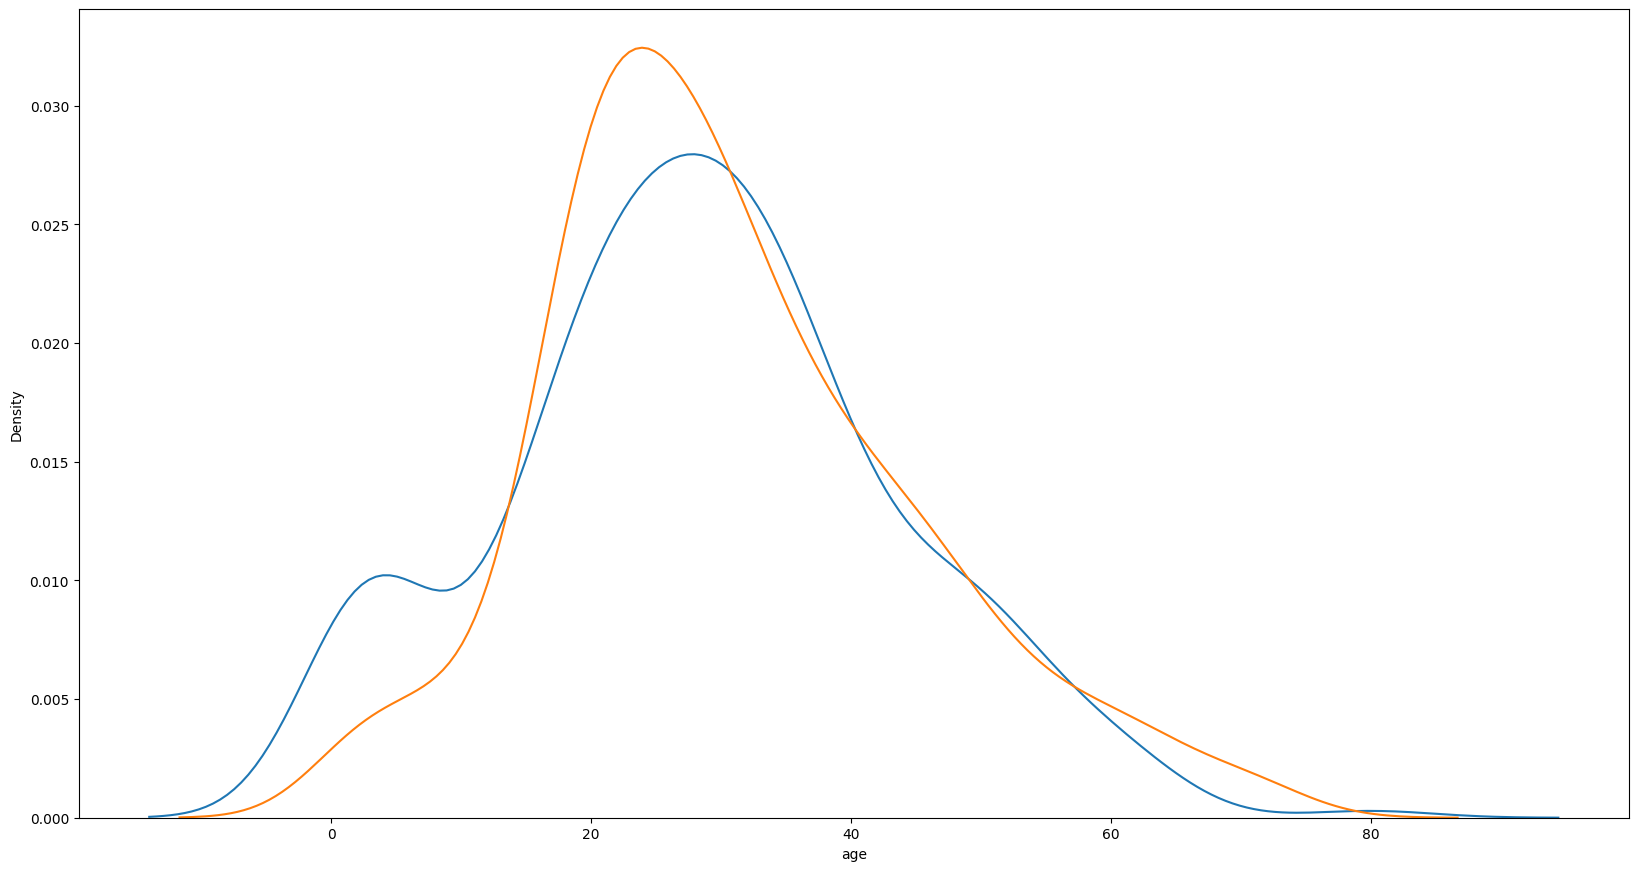

In [162]:
plt.figure(figsize=(20,10.5))

plt.subplot(1,1,1)
sns.kdeplot(df_titanic[df_titanic['survived'] == 1]['age'])
sns.kdeplot(df_titanic[df_titanic['survived'] == 0]['age'])

# ---


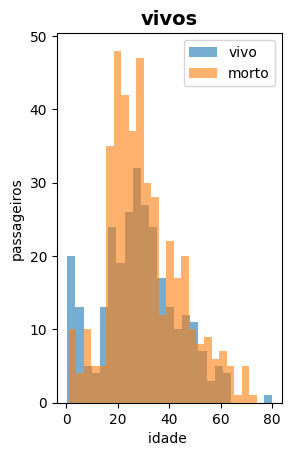

In [164]:
plt.subplot(1,2,2)

plt.hist(df_titanic[df_titanic['survived'] == 1]['age'], bins=25, alpha=0.6,label="vivo")
plt.hist(df_titanic[df_titanic['survived'] == 0]['age'], bins=25, alpha=0.6,label="morto")

plt.title("vivos", fontsize=14, weight='bold')
plt.xlabel('idade ')
plt.ylabel('passageiros')
plt.legend()


### CHAT

Para analisar a influência da idade (age) na sobrevivência (survived) dos passageiros do Titanic, considerando que a idade tem uma distribuição normal, o teste de hipótese mais adequado seria o Teste t de Student para duas amostras independentes. Esse teste compara as médias de duas amostras independentes para determinar se há uma diferença estatisticamente significativa entre elas.

Passos para Realizar o Teste t de Student
   * Preparar os dados: Eliminar dados ausentes na coluna age.
   * Dividir os dados: Separar as idades dos passageiros sobreviventes e não sobreviventes.
   * Executar o teste t de Student: Utilizar a função ttest_ind do scipy.stats.


In [202]:
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind

# Carregar o dataset Titanic
df = sns.load_dataset('titanic')

# Eliminar dados ausentes na coluna 'age'
df = df.dropna(subset=['age'])

# Separar as idades dos passageiros sobreviventes e não sobreviventes
age_survived = df[df['survived'] == 1]['age']
age_not_survived = df[df['survived'] == 0]['age']

# Executar o teste t de Student para duas amostras independentes
stat, p = ttest_ind(age_survived, age_not_survived, alternative='two-sided')

# Mostrar os resultados
print(f"Estatística do teste t: {stat}")
print(f"p-valor: {p}")


Estatística do teste t: -2.06668694625381
p-valor: 0.03912465401348249


***CONCLUSÃO*** Com um p-valor de 0.039, que é menor que 0.05, rejeitamos a hipótese nula de que não há diferença significativa entre as idades dos passageiros sobreviventes e não sobreviventes. Portanto, concluímos que existe uma diferença significativa na idade média entre os passageiros que sobreviveram e os que não sobreviveram no Titanic.



In [203]:
print(f"Média de idade dos sobreviventes: {age_survived.mean()}")
print(f"Média de idade dos não sobreviventes: {age_not_survived.mean()}")


Média de idade dos sobreviventes: 28.343689655172415
Média de idade dos não sobreviventes: 30.62617924528302


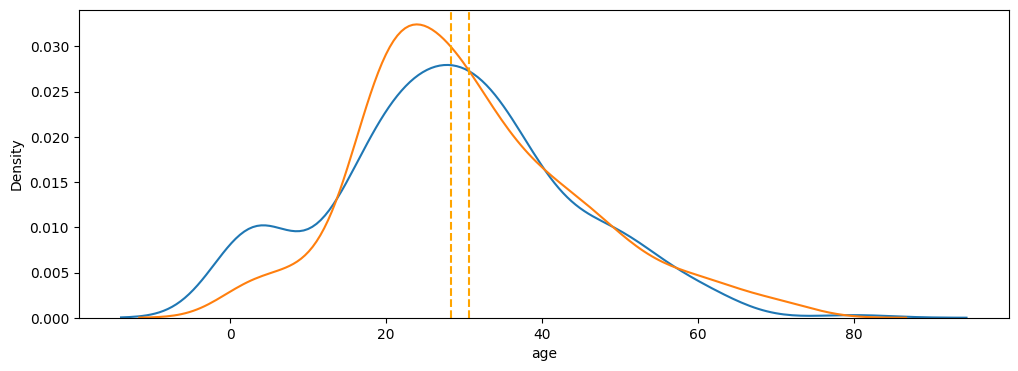

In [206]:
fig, ax = plt.subplots(figsize=(12,4))

sns.kdeplot(df_titanic[df_titanic['survived'] == 1]['age'])
sns.kdeplot(df_titanic[df_titanic['survived'] == 0]['age'])
ax.axvline(x=28.3, color='orange', linestyle='--')
ax.axvline(x=30.6, color='orange', linestyle='--')

# ---


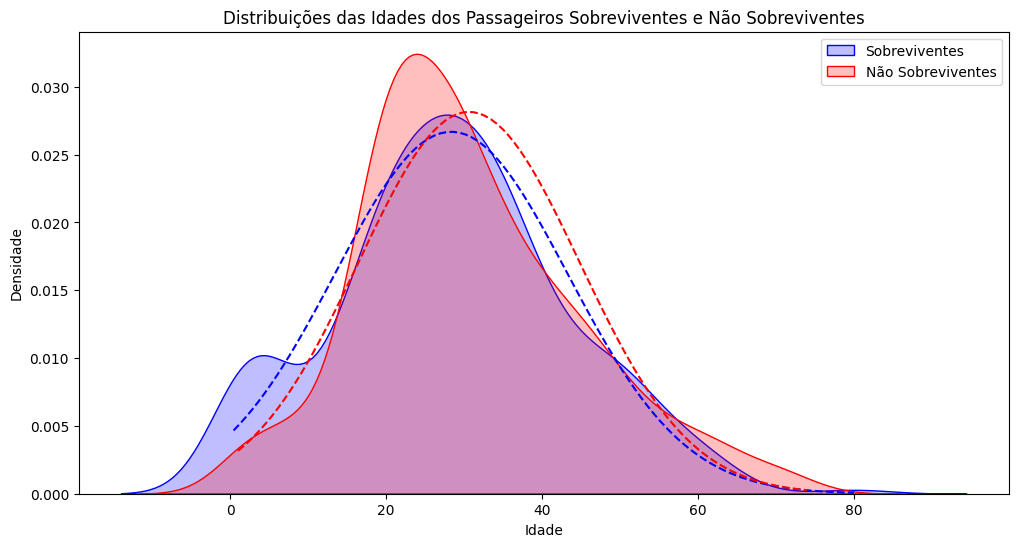

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Carregar o dataset Titanic
df = sns.load_dataset('titanic')

# Eliminar dados ausentes na coluna 'age'
df = df.dropna(subset=['age'])

# Separar as idades dos passageiros sobreviventes e não sobreviventes
age_survived = df[df['survived'] == 1]['age']
age_not_survived = df[df['survived'] == 0]['age']

# Parâmetros das distribuições normais ajustadas
mean_survived, std_survived = age_survived.mean(), age_survived.std()
mean_not_survived, std_not_survived = age_not_survived.mean(), age_not_survived.std()

# Gerar os gráficos das distribuições
plt.figure(figsize=(12, 6))

# Gráfico da densidade das idades dos sobreviventes
sns.kdeplot(age_survived, color='blue', label='Sobreviventes', fill=True)
# Sobrepor a distribuição normal ajustada
x = np.linspace(age_survived.min(), age_survived.max(), 100)
plt.plot(x, norm.pdf(x, mean_survived, std_survived), color='blue', linestyle='--')

# Gráfico da densidade das idades dos não sobreviventes
sns.kdeplot(age_not_survived, color='red', label='Não Sobreviventes', fill=True)
# Sobrepor a distribuição normal ajustada
x = np.linspace(age_not_survived.min(), age_not_survived.max(), 100)
plt.plot(x, norm.pdf(x, mean_not_survived, std_not_survived), color='red', linestyle='--')

# Adicionar título e legendas
plt.title('Distribuições das Idades dos Passageiros Sobreviventes e Não Sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend()
plt.show()


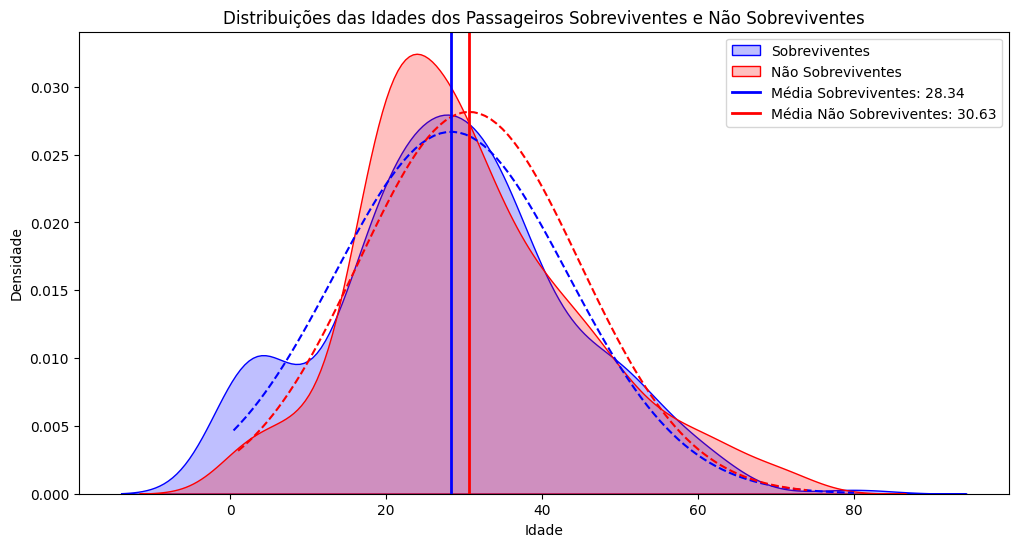

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Carregar o dataset Titanic
df = sns.load_dataset('titanic')

# Eliminar dados ausentes na coluna 'age'
df = df.dropna(subset=['age'])

# Separar as idades dos passageiros sobreviventes e não sobreviventes
age_survived = df[df['survived'] == 1]['age']
age_not_survived = df[df['survived'] == 0]['age']

# Parâmetros das distribuições normais ajustadas
mean_survived, std_survived = age_survived.mean(), age_survived.std()
mean_not_survived, std_not_survived = age_not_survived.mean(), age_not_survived.std()

# Gerar os gráficos das distribuições
plt.figure(figsize=(12, 6))

# Gráfico da densidade das idades dos sobreviventes
sns.kdeplot(age_survived, color='blue', label='Sobreviventes', fill=True)
# Sobrepor a distribuição normal ajustada
x = np.linspace(age_survived.min(), age_survived.max(), 100)
plt.plot(x, norm.pdf(x, mean_survived, std_survived), color='blue', linestyle='--')

# Gráfico da densidade das idades dos não sobreviventes
sns.kdeplot(age_not_survived, color='red', label='Não Sobreviventes', fill=True)
# Sobrepor a distribuição normal ajustada
x = np.linspace(age_not_survived.min(), age_not_survived.max(), 100)
plt.plot(x, norm.pdf(x, mean_not_survived, std_not_survived), color='red', linestyle='--')

# Adicionar linhas verticais nas médias
plt.axvline(mean_survived, color='blue', linestyle='-', linewidth=2, label=f'Média Sobreviventes: {mean_survived:.2f}')
plt.axvline(mean_not_survived, color='red', linestyle='-', linewidth=2, label=f'Média Não Sobreviventes: {mean_not_survived:.2f}')

# Adicionar título e legendas
plt.title('Distribuições das Idades dos Passageiros Sobreviventes e Não Sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend()
plt.show()


# 4 Noticias

In [213]:
df = pd.read_csv(path + 'Cleaned_cnn_comments.csv')
df.head()

,comment_text,likes,comment_time
0,"Just like US did not abandon Vietnam, Iraq, Af...",73,7200.0
1,Anybody else getting tired of these people spe...,193,7200.0
2,"""If two fish are fighting in a river an Englis...",45,7200.0
3,"""Not abandon"" is not equal to ""Defend/no fly-z...",7,7200.0
4,It's time we pray that our world leaders get a...,52,7200.0


In [217]:
def word_exist(x):
  for word in ['Biden','Trump','Ukraine','Russia','US']:
    if x.count(word) > 0:
      return word
  return None

df['word'] = df.comment_text.apply(lambda x: word_exist(x))

df = df[ df['word'] != None ].reset_index(drop=True)
df.groupby('word').word.count().sort_values(ascending=False)

word
Trump      1162
Ukraine     881
Russia      575
US          418
Biden       289
Name: word, dtype: int64

### CHAT

In [224]:
## PROVA P1
def change_stringK2value(s):

  if s.find('K') > 0:
    s = s.replace('K','')
    value = float(s) * 1000
  else:
    value = float(s)

  return value

df['likes_numeric'] = df.likes.apply(lambda s: change_stringK2value(s))

df.groupby('word').likes_numeric.sum().sort_values(ascending=False)

word
Trump      46559.0
Ukraine    17627.0
Russia     13408.0
US         10080.0
Biden       2583.0
Name: likes_numeric, dtype: float64

In [226]:
import pandas as pd
from scipy.stats import ttest_ind


# Filtrar os dados para as palavras "Biden" e "Trump"
biden_comments = df[df['word'] == 'Biden']
trump_comments = df[df['word'] == 'Trump']

# Extrair as quantidades de Likes para os comentários de "Biden" e "Trump"
likes_biden = biden_comments['likes_numeric']
likes_trump = trump_comments['likes_numeric']

# type(likes_trump.to_list()[0])
# likes_trump.to_list()
# Realizar o teste t de Student para duas amostras independentes
stat, p = ttest_ind(likes_biden, likes_trump, equal_var=True, alternative='two-sided')
# 
# Mostrar os resultados
print(f"Estatística do teste t: {stat}")
print(f"p-valor: {p}")


Estatística do teste t: -3.279770869039336
p-valor: 0.0010635834642977317


Estatística do teste t: -3.279770869039336
p-valor: 0.0010635834642977317


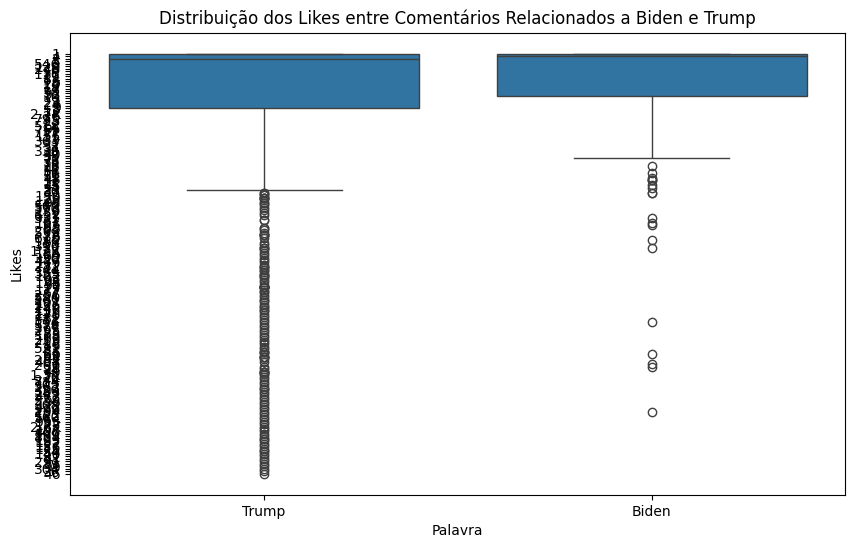

In [228]:


# Filtrar os dados para as palavras "Biden" e "Trump"
biden_comments = df[df['word'] == 'Biden']
trump_comments = df[df['word'] == 'Trump']

# Extrair as quantidades de Likes para os comentários de "Biden" e "Trump"
likes_biden = biden_comments['likes_numeric']
likes_trump = trump_comments['likes_numeric']

# Realizar o teste t de Student para duas amostras independentes
stat, p = ttest_ind(likes_biden, likes_trump, equal_var=True, alternative='two-sided')

# Mostrar os resultados do teste t
print(f"Estatística do teste t: {stat}")
print(f"p-valor: {p}")

# Criar um boxplot para visualizar a distribuição dos Likes
plt.figure(figsize=(10, 6))
sns.boxplot(x='word', y='likes', data=df[df['word'].isin(['Biden', 'Trump'])])
plt.title('Distribuição dos Likes entre Comentários Relacionados a Biden e Trump')
plt.xlabel('Palavra')
plt.ylabel('Likes')
plt.show()


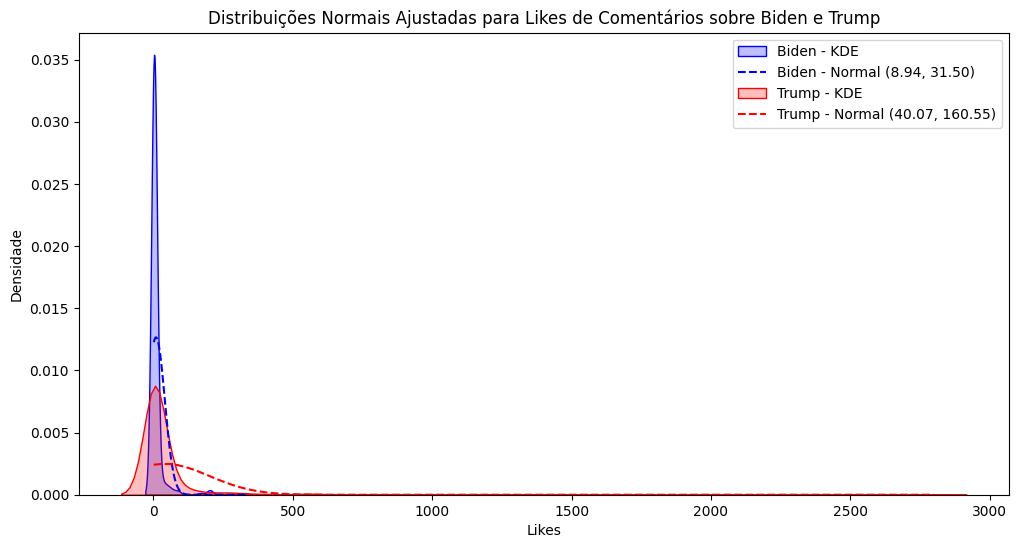

In [232]:
likes_biden = biden_comments['likes_numeric']
likes_trump = trump_comments['likes_numeric']


# Calcular média e desvio padrão
mean_biden, std_biden = likes_biden.mean(), likes_biden.std()
mean_trump, std_trump = likes_trump.mean(), likes_trump.std()

# Gerar valores para o eixo x para as curvas normais
x_biden = np.linspace(likes_biden.min(), likes_biden.max(), 100)
x_trump = np.linspace(likes_trump.min(), likes_trump.max(), 100)

# Calcular as densidades da distribuição normal
pdf_biden = norm.pdf(x_biden, mean_biden, std_biden)
pdf_trump = norm.pdf(x_trump, mean_trump, std_trump)

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Gráfico da densidade dos Likes para "Biden"
sns.kdeplot(likes_biden, color='blue', label='Biden - KDE', fill=True)
plt.plot(x_biden, pdf_biden, color='blue', linestyle='--', label=f'Biden - Normal ({mean_biden:.2f}, {std_biden:.2f})')

# Gráfico da densidade dos Likes para "Trump"
sns.kdeplot(likes_trump, color='red', label='Trump - KDE', fill=True)
plt.plot(x_trump, pdf_trump, color='red', linestyle='--', label=f'Trump - Normal ({mean_trump:.2f}, {std_trump:.2f})')

# Adicionar título e legendas
plt.title('Distribuições Normais Ajustadas para Likes de Comentários sobre Biden e Trump')
plt.xlabel('Likes')
plt.ylabel('Densidade')
plt.legend()
plt.show()


In [231]:

# # Extrair as quantidades de Likes para os comentários de "Biden" e "Trump"
# likes_biden = biden_comments['likes_numeric']
# likes_trump = trump_comments['likes_numeric']



# # Parâmetros das distribuições normais ajustadas
# mean_survived, std_survived = likes_biden.mean(), likes_biden.std()
# mean_not_survived, std_not_survived = likes_trump.mean(), likes_trump.std()

# # Gerar os gráficos das distribuições
# plt.figure(figsize=(12, 6))

# # Gráfico da densidade das idades dos sobreviventes
# sns.kdeplot(likes_biden, color='blue', label='Sobreviventes', fill=True)
# # Sobrepor a distribuição normal ajustada
# x = np.linspace(likes_biden.min(), likes_biden.max(), 100)
# plt.plot(x, norm.pdf(x, mean_survived, std_survived), color='blue', linestyle='--')

# # Gráfico da densidade das idades dos não sobreviventes
# sns.kdeplot(likes_trump, color='red', label='Não Sobreviventes', fill=True)
# # Sobrepor a distribuição normal ajustada
# x = np.linspace(likes_trump.min(), likes_trump.max(), 100)
# plt.plot(x, norm.pdf(x, mean_not_survived, std_not_survived), color='red', linestyle='--')

# # Adicionar linhas verticais nas médias
# plt.axvline(mean_survived, color='blue', linestyle='-', linewidth=2, label=f'Média Sobreviventes: {mean_survived:.2f}')
# plt.axvline(mean_not_survived, color='red', linestyle='-', linewidth=2, label=f'Média Não Sobreviventes: {mean_not_survived:.2f}')

# # Adicionar título e legendas
# plt.title('Distribuições das Idades dos Passageiros Sobreviventes e Não Sobreviventes')
# plt.xlabel('Idade')
# plt.ylabel('Densidade')
# plt.legend()
# plt.show()


# Q5.a. A distribuição de Weibull (weibull_min) representa a probabilidade de falha de peças com desgaste e é amplamente empregada na indústria para prever manutenções.

Crie uma distribuição de Weibull (`weibull_min`) com o parâmetro `c = 1.7` (tempo em anos) e faça um gráfico o mais próximo possível do gráfico abaixo das curvas de distribuição. **Poste a figura do seu gráfico no Canvas na tarefa correspondente**.

Você não precisa se preocupar em reproduzir as cores exatas. Sugestão: empregue o `seaborn` e uma figura `figsize=(12, 4)`.

## ANA

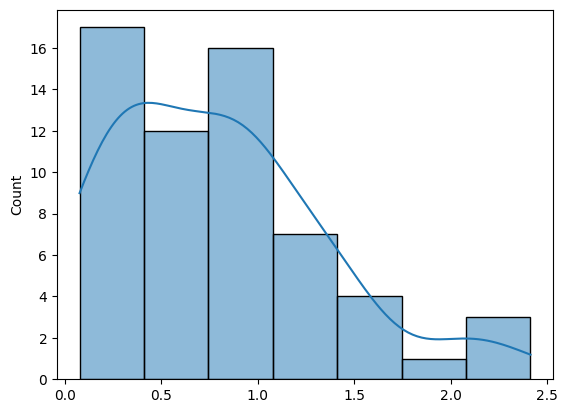

In [175]:
x = weibull_min.rvs(c=1.7, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]
lambda_scale = 5000  # escala, vida média em horas

k_shape = 1.7  # forma, <1 pouquissímas falhas, =1 taxa constante (exponencial), >1.5 taxa aumenta, modelando por exemplo desgaste

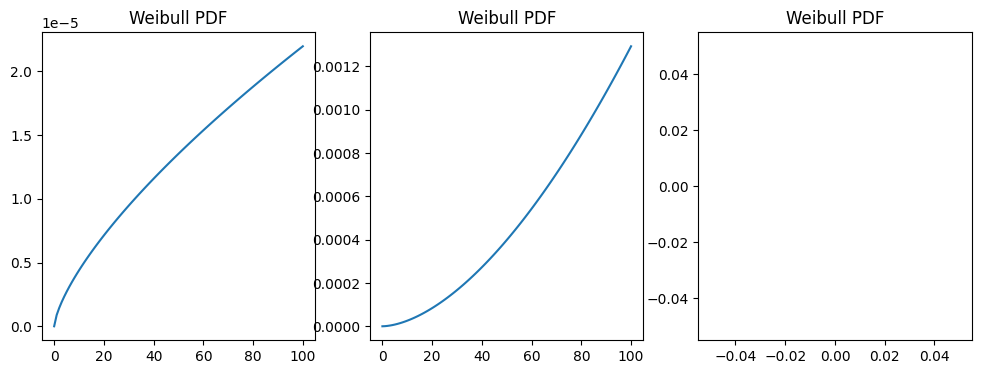

In [176]:
plt.figure(figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)
plt.subplot(1, 3, 1)
plt.title('Weibull PDF')
plt.plot(np.linspace(0,100,100),weibull_min.pdf(np.linspace(0,100,100), c=k_shape, scale=lambda_scale))
plt.subplot(1, 3, 2)
plt.title('Weibull PDF')

plt.plot(np.linspace(0,100,100),weibull_min.cdf(np.linspace(0,100,100), c=k_shape, scale=lambda_scale))
plt.subplot(1, 3, 3)
plt.title('Weibull PDF')

plt.plot(np.linspace(0,100,100),weibull_min.ppf(np.linspace(0,100,100), c=k_shape, scale=lambda_scale))


#### Correção

Aumento do linspace

alteração do intervalo do ppf

Razão para Diferentes linspace

***PDF e CDF:***

* PDF (Função de Densidade de Probabilidade) e CDF (Função de Distribuição Acumulada) são calculadas para valores de tempo (ou qualquer variável contínua em questão). O linspace para PDF e CDF cobre o intervalo dos valores possíveis dessa variável.
* Por exemplo, se o intervalo de tempo é de 0 a 10.000 horas, você usa np.linspace(0, 10000, 1000) para gerar os valores de x.

***PPF (Função Quantil):*** 
* PPF (Função Quantil) é a inversa da CDF e fornece o valor do tempo associado a uma dada probabilidade acumulada. Portanto, o intervalo de linspace para PPF deve cobrir o intervalo das probabilidades acumuladas, que é de 0 a 1.
* Usar np.linspace(0.01, 0.99, 1000) gera um intervalo de probabilidades acumuladas (de 1% a 99%) para obter os valores de tempo correspondentes. Isso garante que o PPF seja calculado para todas as probabilidades relevantes sem incluir extremos que poderiam levar a valores infinitos ou não definidos.

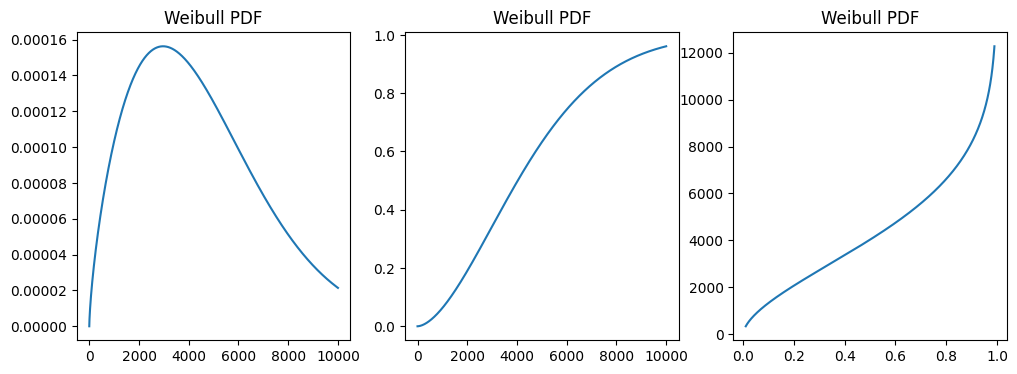

In [237]:
plt.figure(figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)
plt.subplot(1, 3, 1)
plt.title('Weibull PDF')
plt.plot(np.linspace(0,10000,10000),weibull_min.pdf(np.linspace(0,10000,10000), c=k_shape, scale=lambda_scale))
plt.subplot(1, 3, 2)
plt.title('Weibull PDF')

plt.plot(np.linspace(0,10000,10000),weibull_min.cdf(np.linspace(0,10000,10000), c=k_shape, scale=lambda_scale))
plt.subplot(1, 3, 3)
plt.title('Weibull PDF')

plt.plot(np.linspace(0.01, 0.99, 1000),weibull_min.ppf(np.linspace(0.01, 0.99, 1000), c=k_shape, scale=lambda_scale))


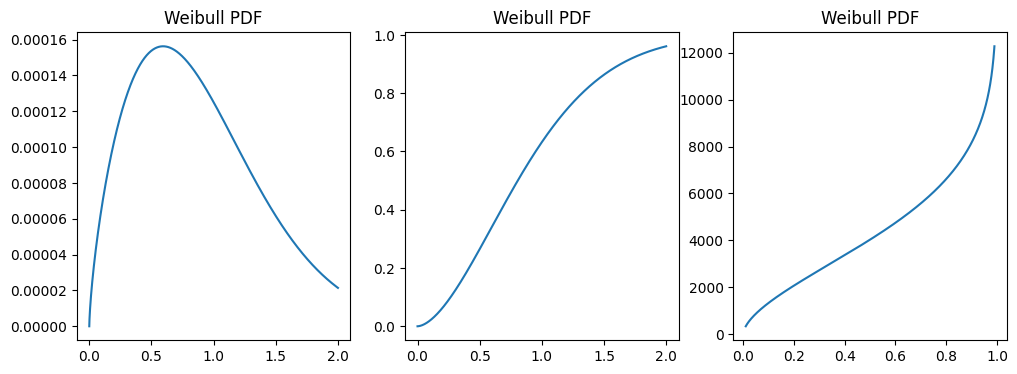

In [238]:
plt.figure(figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)
plt.subplot(1, 3, 1)
plt.title('Weibull PDF')
plt.plot(np.linspace(0,2,10000),weibull_min.pdf(np.linspace(0,10000,10000), c=k_shape, scale=lambda_scale))
plt.subplot(1, 3, 2)
plt.title('Weibull PDF')

plt.plot(np.linspace(0,2,10000),weibull_min.cdf(np.linspace(0,10000,10000), c=k_shape, scale=lambda_scale))
plt.subplot(1, 3, 3)
plt.title('Weibull PDF')

plt.plot(np.linspace(0.01, 0.99, 1000),weibull_min.ppf(np.linspace(0.01, 0.99, 1000), c=k_shape, scale=lambda_scale))


### ANA CORRIGIDO

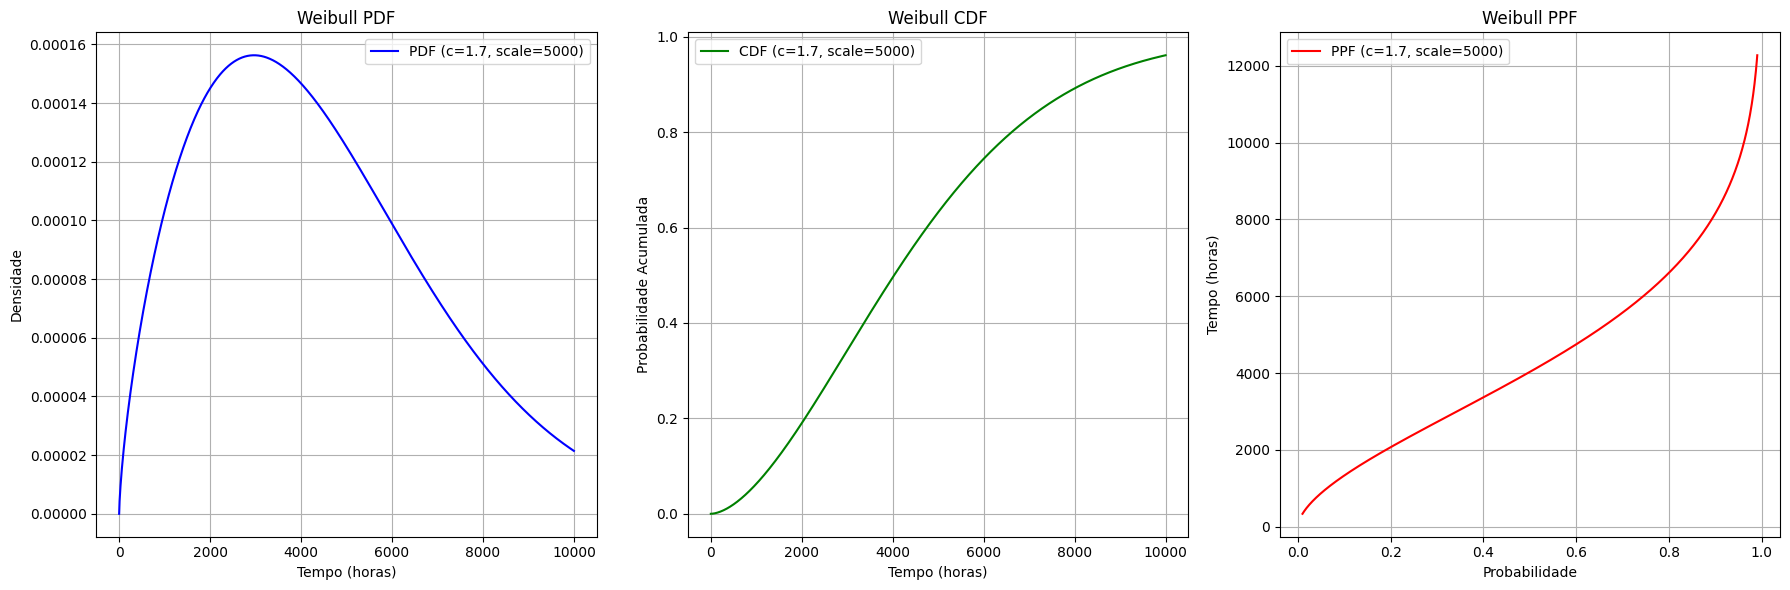

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parâmetros da distribuição de Weibull
lambda_scale = 5000  # escala, vida média em horas
k_shape = 1.7       # forma

# Criar valores para o eixo x
x = np.linspace(0, 10000, 1000)  # Aumentei o intervalo para acomodar o scale

# Calcular PDF, CDF e PPF
pdf = weibull_min.pdf(x, c=k_shape, scale=lambda_scale)
cdf = weibull_min.cdf(x, c=k_shape, scale=lambda_scale)
ppf = weibull_min.ppf(np.linspace(0.01, 0.99, 1000), c=k_shape, scale=lambda_scale)

# Criar os gráficos
plt.figure(figsize=(18, 6))

# Gráfico da PDF
plt.subplot(1, 3, 1)
plt.plot(x, pdf, label=f'PDF (c={k_shape}, scale={lambda_scale})', color='blue')
plt.title('Weibull PDF')
plt.xlabel('Tempo (horas)')
plt.ylabel('Densidade')
plt.grid(True)
plt.legend()

# Gráfico da CDF
plt.subplot(1, 3, 2)
plt.plot(x, cdf, label=f'CDF (c={k_shape}, scale={lambda_scale})', color='green')
plt.title('Weibull CDF')
plt.xlabel('Tempo (horas)')
plt.ylabel('Probabilidade Acumulada')
plt.grid(True)
plt.legend()

# Gráfico da PPF
plt.subplot(1, 3, 3)
plt.plot(np.linspace(0.01, 0.99, 1000), ppf, label=f'PPF (c={k_shape}, scale={lambda_scale})', color='red')
plt.title('Weibull PPF')
plt.xlabel('Probabilidade')
plt.ylabel('Tempo (horas)')
plt.grid(True)
plt.legend()

# Ajustar o layout e mostrar
plt.tight_layout()
plt.show()


## Joao

In [189]:
from scipy.stats import weibull_min

sample_size = 1000
np.random.seed(1)
normal_samples = weibull_min.rvs(c=1.7, size=sample_size)
normal_samples[:10]

array([0.69566159, 1.15315977, 0.00480159, 0.54829025, 0.33866209,
       0.25332459, 0.39494317, 0.60365566, 0.66941331, 0.86008273])

In [190]:
y = weibull_min.pdf(normal_samples, c=1.7)

In [191]:
np.random.seed(1)
x = x = np.linspace(0,1,50)
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

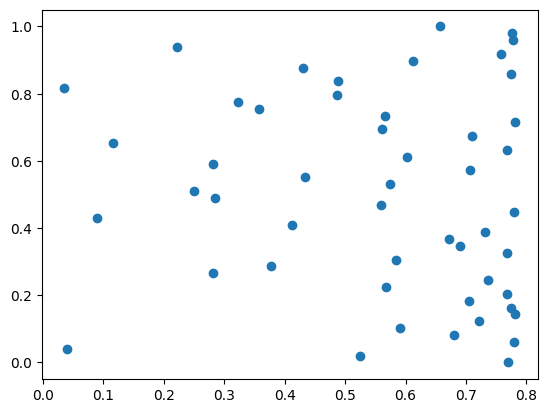

In [192]:
plt.scatter(y[:50],x)

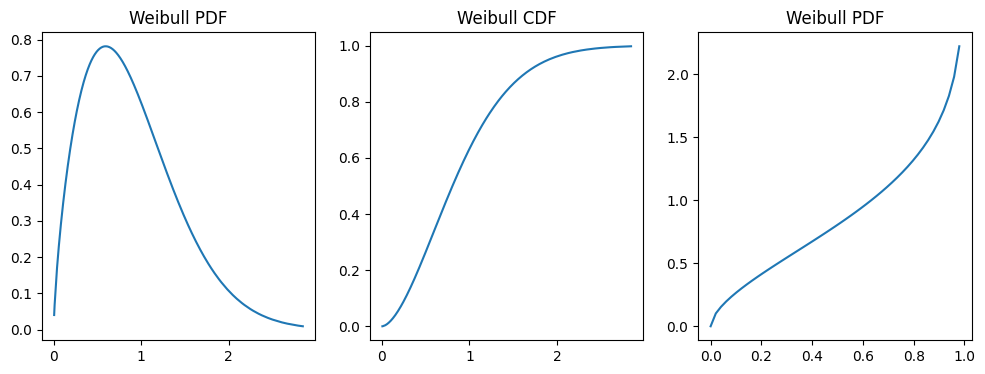

In [193]:
fig, ax = plt.subplots(1,3,figsize=(12, 4))
sns.lineplot(x=normal_samples, y=weibull_min.pdf(normal_samples, c=1.7),ax=ax[0])
sns.lineplot(x=normal_samples,y=weibull_min.cdf(normal_samples, c=1.7),ax=ax[1])
sns.lineplot(x=x,y=weibull_min.ppf(x, c=1.7),ax=ax[2])

ax[0].set_title('Weibull PDF')
ax[1].set_title('Weibull CDF')
ax[2].set_title('Weibull PPF')

plt.title('Weibull PDF')
plt.show()

## CHAT

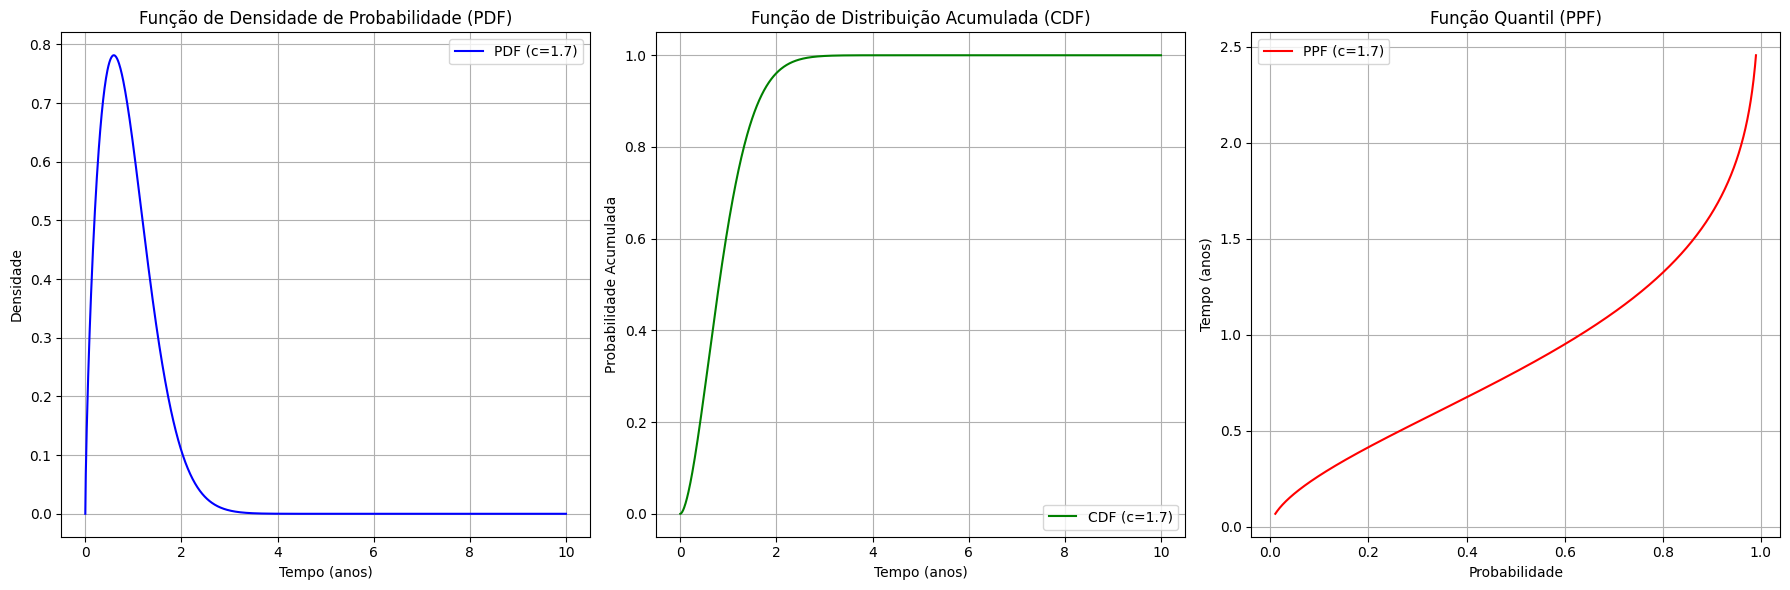

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parâmetro da distribuição de Weibull
c = 1.7

# Gerar valores para o eixo x
x = np.linspace(0, 10, 1000)

# Calcular PDF, CDF e PPF
pdf = weibull_min.pdf(x, c)
cdf = weibull_min.cdf(x, c)
ppf = weibull_min.ppf(np.linspace(0.01, 0.99, 1000), c)

# Criar gráficos
plt.figure(figsize=(18, 6))

# Gráfico da PDF
plt.subplot(1, 3, 1)
plt.plot(x, pdf, label=f'PDF (c={c})', color='blue')
plt.title('Função de Densidade de Probabilidade (PDF)')
plt.xlabel('Tempo (anos)')
plt.ylabel('Densidade')
plt.grid(True)
plt.legend()

# Gráfico da CDF
plt.subplot(1, 3, 2)
plt.plot(x, cdf, label=f'CDF (c={c})', color='green')
plt.title('Função de Distribuição Acumulada (CDF)')
plt.xlabel('Tempo (anos)')
plt.ylabel('Probabilidade Acumulada')
plt.grid(True)
plt.legend()

# Gráfico da PPF
plt.subplot(1, 3, 3)
plt.plot(np.linspace(0.01, 0.99, 1000), ppf, label=f'PPF (c={c})', color='red')
plt.title('Função Quantil (PPF)')
plt.xlabel('Probabilidade')
plt.ylabel('Tempo (anos)')
plt.grid(True)
plt.legend()

# Ajustar layout e mostrar
plt.tight_layout()
plt.show()


## Probabilidades

TEMPLATE

In [239]:
from scipy.stats import weibull_min

# Parâmetros
c = 1.7        # Parâmetro de forma
scale = 1      # Escala padrão, ajuste conforme necessário

# Tempo
t = 2

# Calcular a CDF para 2 anos
cdf_2_years = weibull_min.cdf(t, c=c, scale=scale)

# Probabilidade de não falhar após 2 anos
prob_no_fail = 1 - cdf_2_years

print(f"Probabilidade de uma peça não apresentar problemas após 2 anos: {prob_no_fail:.4f}")


Probabilidade de uma peça não apresentar problemas após 2 anos: 0.0388


In [194]:

# Considerando a distribuição Weibull(1.7), qual a probabilidade de uma peça não apresentar problemas depois de 2 anos?
probabilidade = 1 - weibull_min.cdf(2, c=1.7)
probabilidade

np.float64(0.038812629395792664)

In [195]:
# Considerando a distribuição Weibull(1.7), qual a probabilidade de uma peça apresentar problemas entre 1 e 2 anos?


probabilidade = weibull_min.cdf(2, c=1.7) - weibull_min.cdf(1, c=1.7)
probabilidade

np.float64(0.32906681177564967)

In [196]:
# Considerando a distribuição Weibull(1.7), na aquisição e começo de uso das peças você compra 25% de peças adicionais para substituição. Até quando esse estoque de peças deve atender as trocas necessárias tendo que programar a próxima compra de estoques?


anos = weibull_min.ppf(0.25, c=1.7)
anos

np.float64(0.4805221493741585)

# 6 Temp

In [244]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel(path + 'dataexport_20240613T041833.xlsx',skiprows=9)
df.set_index('timestamp',inplace=True)
df.columns = ['T']
df = df.resample('M').mean()
df.head()

,T
timestamp,
2014-01-31,4.613095
2014-02-28,5.618519
2014-03-31,8.180178
2014-04-30,12.219051
2014-05-31,14.170581


In [246]:
import pandas as pd
import numpy as np


# Inicializar uma lista para armazenar as correlações
correlations = []

# Calcular a correlação para diferentes defasagens
for lag in range(1, 13):
    shifted_series = df['T'].shift(lag)
    correlation = df['T'].corr(shifted_series)
    correlations.append(correlation)
    print(f'Correlação entre T(t) e T(t-{lag}): {correlation:.4f}')

# Mostrar os resultados
print("\nCorrelação para diferentes defasagens:")
for lag, correlation in enumerate(correlations, start=1):
    print(f'Correlação entre T(t) e T(t-{lag}): {correlation:.4f}')


Correlação entre T(t) e T(t-1): 0.8251
Correlação entre T(t) e T(t-2): 0.4608
Correlação entre T(t) e T(t-3): -0.0027
Correlação entre T(t) e T(t-4): -0.4749
Correlação entre T(t) e T(t-5): -0.8079
Correlação entre T(t) e T(t-6): -0.9244
Correlação entre T(t) e T(t-7): -0.8004
Correlação entre T(t) e T(t-8): -0.4628
Correlação entre T(t) e T(t-9): -0.0067
Correlação entre T(t) e T(t-10): 0.4644
Correlação entre T(t) e T(t-11): 0.8077
Correlação entre T(t) e T(t-12): 0.9287

Correlação para diferentes defasagens:
Correlação entre T(t) e T(t-1): 0.8251
Correlação entre T(t) e T(t-2): 0.4608
Correlação entre T(t) e T(t-3): -0.0027
Correlação entre T(t) e T(t-4): -0.4749
Correlação entre T(t) e T(t-5): -0.8079
Correlação entre T(t) e T(t-6): -0.9244
Correlação entre T(t) e T(t-7): -0.8004
Correlação entre T(t) e T(t-8): -0.4628
Correlação entre T(t) e T(t-9): -0.0067
Correlação entre T(t) e T(t-10): 0.4644
Correlação entre T(t) e T(t-11): 0.8077
Correlação entre T(t) e T(t-12): 0.9287


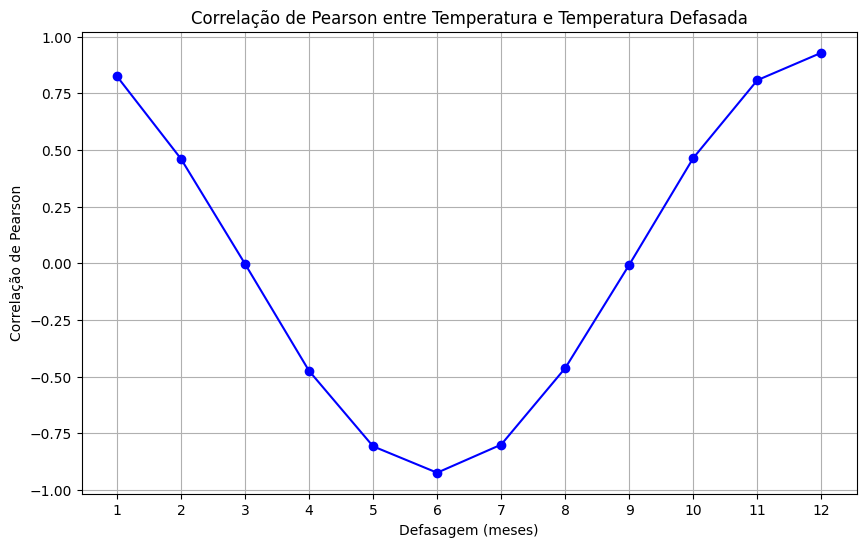


Correlação para diferentes defasagens:
Correlação entre T(t) e T(t-1): 0.8251
Correlação entre T(t) e T(t-2): 0.4608
Correlação entre T(t) e T(t-3): -0.0027
Correlação entre T(t) e T(t-4): -0.4749
Correlação entre T(t) e T(t-5): -0.8079
Correlação entre T(t) e T(t-6): -0.9244
Correlação entre T(t) e T(t-7): -0.8004
Correlação entre T(t) e T(t-8): -0.4628
Correlação entre T(t) e T(t-9): -0.0067
Correlação entre T(t) e T(t-10): 0.4644
Correlação entre T(t) e T(t-11): 0.8077
Correlação entre T(t) e T(t-12): 0.9287


In [245]:
import pandas as pd
import matplotlib.pyplot as plt

# Inicializar listas para armazenar as correlações e defasagens
lags = list(range(1, 13))
correlations = []

# Calcular a correlação para diferentes defasagens
for lag in lags:
    shifted_series = df['T'].shift(lag)
    correlation = df['T'].corr(shifted_series)
    correlations.append(correlation)

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(lags, correlations, marker='o', linestyle='-', color='b')
plt.xlabel('Defasagem (meses)')
plt.ylabel('Correlação de Pearson')
plt.title('Correlação de Pearson entre Temperatura e Temperatura Defasada')
plt.grid(True)
plt.xticks(lags)
plt.show()

# Mostrar os resultados
print("\nCorrelação para diferentes defasagens:")
for lag, correlation in zip(lags, correlations):
    print(f'Correlação entre T(t) e T(t-{lag}): {correlation:.4f}')


# Correlações de dois valores distintos 

In [242]:
import numpy as np
import pandas as pd

# Dados
data_a = [2, 4, 6, 8, 10]
data_b = [1, 3, 5, 7, 9]

# Criar DataFrame
df = pd.DataFrame({'A': data_a, 'B': data_b})

# Calcular correlação de Pearson
correlation = df['A'].corr(df['B'])
print(f'Correlação de Pearson: {correlation:.4f}')


Correlação de Pearson: 1.0000


In [247]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, kendalltau

# Dados
data_a = [2, 4, 6, 8, 10]
data_b = [1, 3, 5, 7, 9]

# Criar DataFrame
df = pd.DataFrame({'A': data_a, 'B': data_b})

# Calcular correlação de Pearson
pearson_corr = df['A'].corr(df['B'])
print(f'Correlação de Pearson: {pearson_corr:.4f}')

# Calcular correlação de Spearman
spearman_corr, _ = spearmanr(df['A'], df['B'])
print(f'Correlação de Spearman: {spearman_corr:.4f}')

# Calcular correlação de Kendall
kendall_corr, _ = kendalltau(df['A'], df['B'])
print(f'Correlação de Kendall: {kendall_corr:.4f}')


Correlação de Pearson: 1.0000
Correlação de Spearman: 1.0000
Correlação de Kendall: 1.0000


In [248]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, kendalltau

# Dados
data_a = [2, 4, 6, 8, 10]
data_b = [1, 8, 5, 7, 9]

# Criar DataFrame
df = pd.DataFrame({'A': data_a, 'B': data_b})

# Calcular correlação de Pearson
pearson_corr = df['A'].corr(df['B'])
print(f'Correlação de Pearson: {pearson_corr:.4f}')

# Calcular correlação de Spearman
spearman_corr, _ = spearmanr(df['A'], df['B'])
print(f'Correlação de Spearman: {spearman_corr:.4f}')

# Calcular correlação de Kendall
kendall_corr, _ = kendalltau(df['A'], df['B'])
print(f'Correlação de Kendall: {kendall_corr:.4f}')


Correlação de Pearson: 0.7500
Correlação de Spearman: 0.7000
Correlação de Kendall: 0.6000


# Varios elementos dos graficos

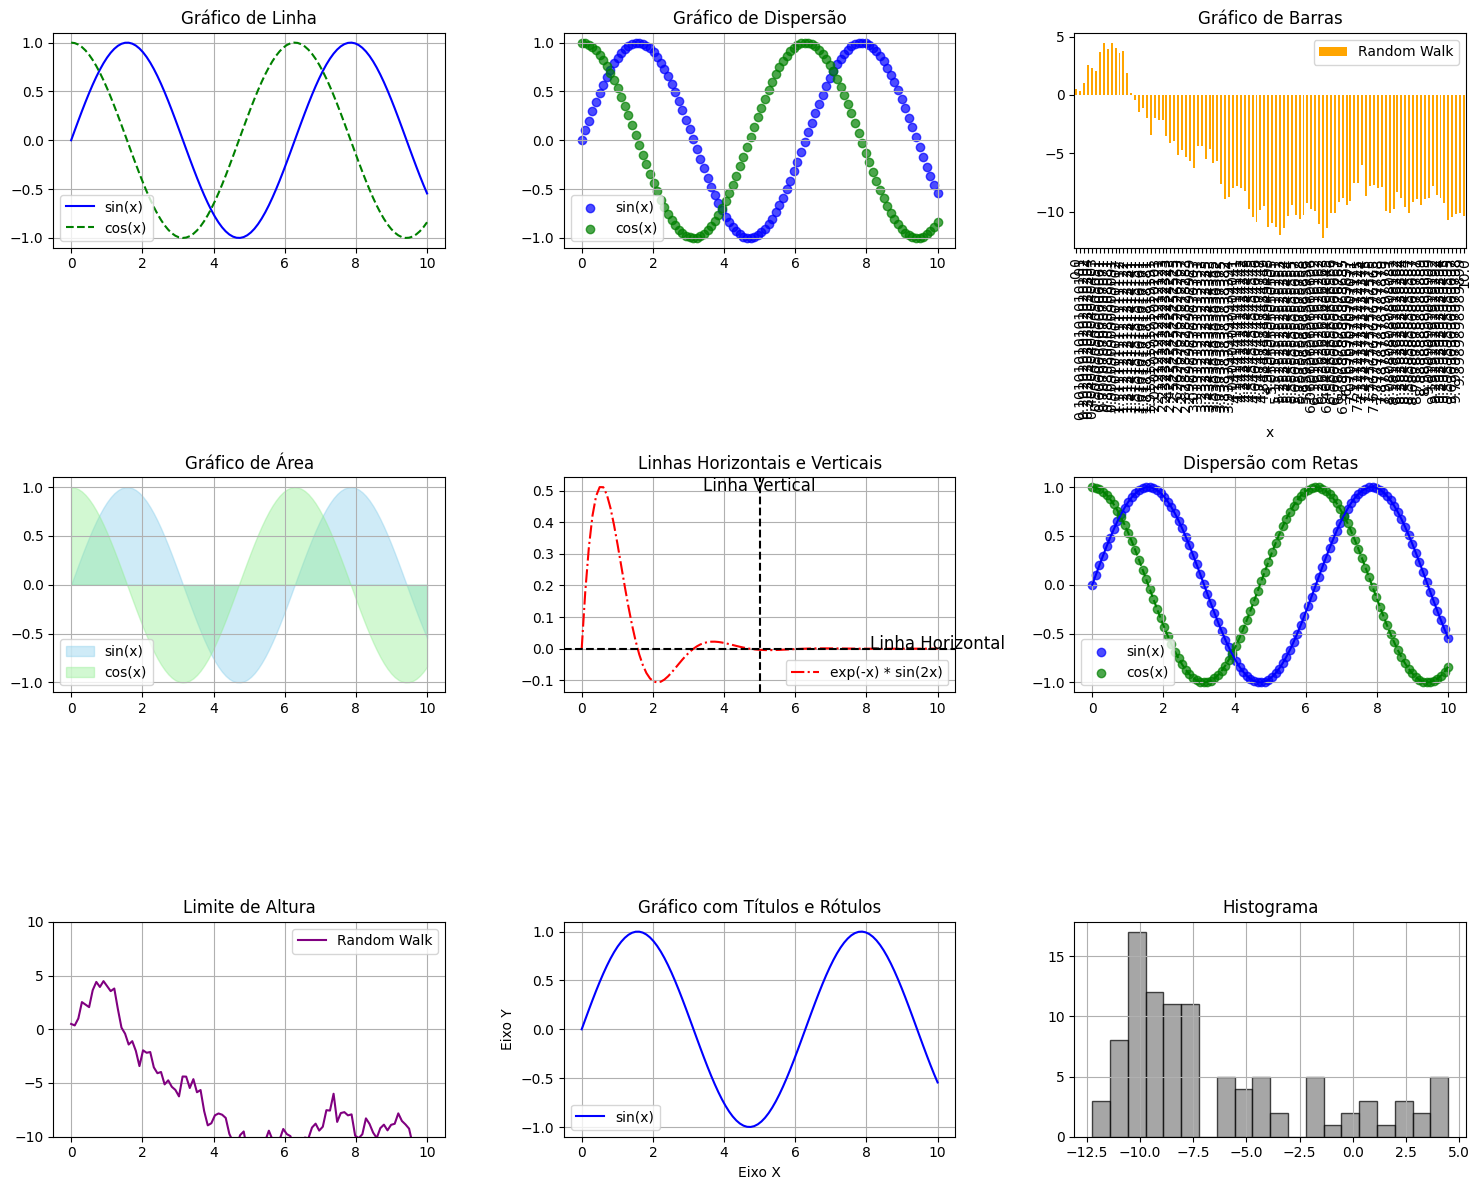

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar dados
np.random.seed(42)
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(-x) * np.sin(2 * x)
y4 = np.random.randn(100).cumsum()

# Criar DataFrame para alguns gráficos
df = pd.DataFrame({
    'x': x,
    'sin(x)': y1,
    'cos(x)': y2,
    'exp(-x) * sin(2x)': y3,
    'Random Walk': y4
})

fig, ax = plt.subplots(3, 3, figsize=(15, 12))

# Gráfico de Linha
ax[0, 0].plot(x, y1, label='sin(x)', color='blue', linestyle='-')
ax[0, 0].plot(x, y2, label='cos(x)', color='green', linestyle='--')
ax[0, 0].set_title('Gráfico de Linha')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Gráfico de Dispersão
ax[0, 1].scatter(x, y1, label='sin(x)', color='blue', alpha=0.7)
ax[0, 1].scatter(x, y2, label='cos(x)', color='green', alpha=0.7)
ax[0, 1].set_title('Gráfico de Dispersão')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Gráfico de Barras
df_bar = df[['x', 'Random Walk']].copy()
df_bar.set_index('x', inplace=True)
df_bar.plot(kind='bar', ax=ax[0, 2], color='orange')
ax[0, 2].set_title('Gráfico de Barras')

# Gráfico de Área
ax[1, 0].fill_between(x, y1, color='skyblue', alpha=0.4, label='sin(x)')
ax[1, 0].fill_between(x, y2, color='lightgreen', alpha=0.4, label='cos(x)')
ax[1, 0].set_title('Gráfico de Área')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Gráfico de Linhas com Pontilhado e Textos
ax[1, 1].plot(x, y3, label='exp(-x) * sin(2x)', color='red', linestyle='-.')
ax[1, 1].axhline(0, color='black', linestyle='--')
ax[1, 1].axvline(5, color='black', linestyle='--')
ax[1, 1].set_title('Linhas Horizontais e Verticais')
ax[1, 1].text(5, 0.5, 'Linha Vertical', color='black', fontsize=12, ha='center')
ax[1, 1].text(10, 0, 'Linha Horizontal', color='black', fontsize=12, ha='center')
ax[1, 1].legend()
ax[1, 1].grid(True)

# Gráfico de Dispersão com Retas
ax[1, 2].scatter(df['x'], df['sin(x)'], label='sin(x)', color='blue', alpha=0.7)
ax[1, 2].scatter(df['x'], df['cos(x)'], label='cos(x)', color='green', alpha=0.7)
ax[1, 2].plot(df['x'], df['sin(x)'], color='blue', linestyle='-')
ax[1, 2].plot(df['x'], df['cos(x)'], color='green', linestyle='--')
ax[1, 2].set_title('Dispersão com Retas')
ax[1, 2].legend()
ax[1, 2].grid(True)

# Gráfico de Linhas com Limite de Altura
ax[2, 0].plot(x, y4, label='Random Walk', color='purple')
ax[2, 0].set_ylim(-10, 10)  # Limitar a altura do gráfico
ax[2, 0].set_title('Limite de Altura')
ax[2, 0].legend()
ax[2, 0].grid(True)

# Gráfico de Linhas com Títulos e Rótulos
ax[2, 1].plot(x, y1, label='sin(x)', color='blue')
ax[2, 1].set_title('Gráfico com Títulos e Rótulos')
ax[2, 1].set_xlabel('Eixo X')
ax[2, 1].set_ylabel('Eixo Y')
ax[2, 1].legend()
ax[2, 1].grid(True)

# Gráfico de Histogramas
ax[2, 2].hist(y4, bins=20, color='gray', edgecolor='black', alpha=0.7)
ax[2, 2].set_title('Histograma')
ax[2, 2].grid(True)

plt.tight_layout()
plt.show()
